In [52]:
# Dependencies and Setup
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn
import requests
import json

#import api key
from JRS_api_keys import geoapify_key

#Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [53]:
# Read the data
data = pd.read_csv("Resources/Life_happiness_mergedupdate.csv",index_col=0)
data_2015 = pd.read_csv("Resources/2015_Life_happiness_mergedupdate.csv",index_col=0)

# Display the data table for preview
data_2015

Country  happiness_score  gdp_per_capita  \
0                           Afghanistan             3.79            0.40   
1                               Albania             4.64            1.00   
2                               Algeria             5.87            1.09   
3                                Angola              NaN             NaN   
4                   Antigua and Barbuda              NaN             NaN   
..                                  ...              ...             ...   
178  Venezuela (Bolivarian Republic of)              NaN             NaN   
179                            Viet Nam              NaN             NaN   
180                               Yemen             3.59            0.59   
181                              Zambia             4.51            0.64   
182                            Zimbabwe             3.88            0.38   

     family  health  freedom  generosity  government_trust  dystopia_residual  \
0      0.58    0.18     0.11        0.31              0.06               2.15   
1      0.80    0.73     0.38        0.20              0.04               1.49   
2      1.15    0.62     0.23        0.07              0.15               2.57   
3       NaN     NaN      NaN         NaN               NaN                NaN   
4       NaN     NaN      NaN         NaN               NaN                NaN   
..      ...     ...      ...         ...               ...                ...   
178     NaN     NaN      NaN         NaN               NaN                NaN   
179     NaN     NaN      NaN         NaN               NaN                NaN   
180    0.94    0.31     0.25        0.10              0.06               1.35   
181    1.00    0.26     0.46        0.25              0.08               1.83   
182    1.08    0.20     0.34        0.19              0.10               1.60   

    continent  ...  Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0        Asia  ...   6.00               8.16        65.00       0.10   
1      Europe  ...  99.00               6.00        99.00       0.10   
2      Africa  ...  95.00                NaN        95.00       0.10   
3         NaN  ...   7.00                NaN        64.00       1.90   
4         NaN  ...  86.00                NaN        99.00       0.20   
..        ...  ...    ...                ...          ...        ...   
178       NaN  ...  87.00                NaN        87.00       0.10   
179       NaN  ...  97.00                NaN        97.00       0.10   
180      Asia  ...  63.00                NaN        69.00       0.10   
181    Africa  ...   9.00                NaN         9.00       4.10   
182    Africa  ...  88.00                NaN        87.00       6.20   

          GDP    Population   thinness  1-19 years   thinness 5-9 years  \
0      584.26 33,736,494.00                  17.20                17.30   
1    3,954.23     28,873.00                   1.20                 1.30   
2    4,132.76 39,871,528.00                   6.00                 5.80   
3    3,695.79  2,785,935.00                   8.30                 8.20   
4   13,566.95           NaN                   3.30                 3.30   
..        ...           ...                    ...                  ...   
178       NaN           NaN                   1.60                 1.50   
179       NaN           NaN                  14.20                14.50   
180       NaN           NaN                  13.60                13.40   
181  1,313.89    161,587.00                   6.30                 6.10   
182    118.69 15,777,451.00                   5.60                 5.50   

     Income composition of resources  Schooling  
0                               0.48      10.10  
1                               0.76      14.20  
2                               0.74      14.40  
3                               0.53      11.40  
4                               0.78      13.90  
..                               ...        ...  
178                           

In [55]:
#Drop nul rows
LH_dataf = data[data["happiness_score"].notna()]
LH_dataf.astype({"Year_x":"category"}).dtypes
LH2015_dataf = data_2015[data_2015["happiness_score"].notna()]
LH2015_dataf

Country  happiness_score  gdp_per_capita  family  health  freedom  \
0    Afghanistan             3.79            0.40    0.58    0.18     0.11   
1        Albania             4.64            1.00    0.80    0.73     0.38   
2        Algeria             5.87            1.09    1.15    0.62     0.23   
5      Argentina             6.60            1.19    1.44    0.70     0.49   
6        Armenia             4.38            0.90    1.01    0.64     0.20   
..           ...              ...             ...     ...     ...      ...   
175      Uruguay             6.45            1.22    1.41    0.72     0.58   
176   Uzbekistan             5.97            0.79    1.55    0.50     0.66   
180        Yemen             3.59            0.59    0.94    0.31     0.25   
181       Zambia             4.51            0.64    1.00    0.26     0.46   
182     Zimbabwe             3.88            0.38    1.08    0.20     0.34   

     generosity  government_trust  dystopia_residual      continent  ...  \
0          0.31              0.06               2.15           Asia  ...   
1          0.20              0.04               1.49         Europe  ...   
2          0.07              0.15               2.57         Africa  ...   
5          0.11              0.06               2.61  South America  ...   
6          0.08              0.03               1.52           Asia  ...   
..          ...               ...                ...            ...  ...   
175        0.18              0.18               2.17  South America  ...   
176        0.42              0.25               1.82           Asia  ...   
180        0.10              0.06               1.35           Asia  ...   
181        0.25              0.08               1.83         Africa  ...   
182        0.19              0.10               1.60         Africa  ...   

     Polio  Total expenditure  Diphtheria    HIV/AIDS       GDP    Population  \
0     6.00               8.16        65.00       0.10    584.26 33,736,494.00   
1    99.00               6.00        99.00       0.10  3,954.23     28,873.00   
2    95.00                NaN        95.00       0.10  4,132.76 39,871,528.00   
5    93.00                NaN        94.00       0.10 13,467.12 43,417,765.00   
6    96.00                NaN        94.00       0.10    369.65    291,695.00   
..     ...                ...          ...        ...       ...           ...   
175  95.00                NaN        95.00       0.10 15,524.84  3,431,552.00   
176  99.00                NaN        99.00       0.10  2,137.58    312,989.00   
180  63.00                NaN        69.00       0.10       NaN           NaN   
181   9.00                NaN         9.00       4.10  1,313.89    161,587.00   
182  88.00                NaN        87.00       6.20    118.69 15,777,451.00   

      thinness  1-19 years   thinness 5-9 years  \
0                    17.20                17.30   
1                     1.20                 1.30   
2                     6.00                 5.80   
5                     1.00                 0.90   
6                     2.10                 2.20   
..                     ...                  ...   
175                   1.50                 1.40   
176                   3.00                 3.10   
180                  13.60                13.40   
181                   6.30                 6.10   
182                   5.60                 5.50   

     Income composition of resources  Schooling  
0                               0.48      10.10  
1                               0.76      14.20  
2                               0.74      14.40  
5                               0.83      17.30  
6                               0.74      12.70  
..                               ...        ...  
175                             0.79      15.50  
176                             0.70      12.10  
180                             0.50       9.00  
181                             0.58      12.50  
182                    

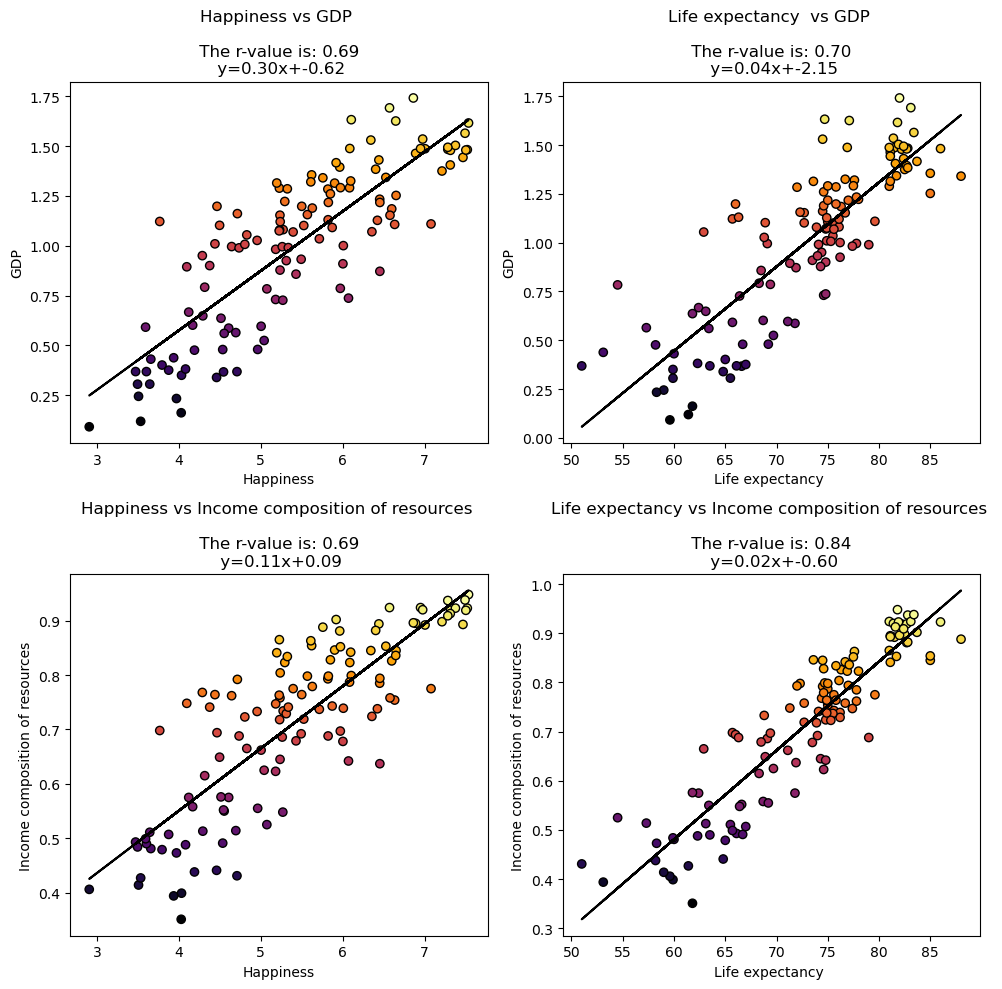

In [4]:
plt.rcParams["figure.figsize"] = (10,10)

plt.subplot(2,2,1)
# Linear regression
x_values = LH2015_dataf["happiness_score"]
x_axis_label = "Happiness"
y_values = LH2015_dataf["gdp_per_capita"]
y_axis_label = "GDP"

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
def JRSfunc(x_values):
    return slope * x_values + intercept
regression_line = list(map(JRSfunc, x_values))

title = f"Happiness vs GDP \n \n The r-value is: {rvalue**2:.2f} \n y={slope:.2f}x+{intercept:.2f}"
                      
# Incorporate the scatterplot
plt.scatter(x_values,y_values,marker ="o", c = y_values, edgecolors ="black",cmap = 'inferno')
plt.plot(x_values,regression_line,"k-")
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)

plt.subplot(2,2,2)
# Linear regression
x_values = LH2015_dataf["Life expectancy "]
x_axis_label = "Life expectancy "
y_values = LH2015_dataf["gdp_per_capita"]
y_axis_label = "GDP"

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
def JRSfunc(x_values):
    return slope * x_values + intercept
regression_line = list(map(JRSfunc, x_values))

title = f"Life expectancy  vs GDP \n \n The r-value is: {rvalue**2:.2f} \n y={slope:.2f}x+{intercept:.2f}"
                      
# Incorporate the scatterplot
plt.scatter(x_values,y_values,marker ="o", c = y_values, edgecolors ="black",cmap = 'inferno')
plt.plot(x_values,regression_line,"k-")
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)


plt.subplot(2,2,3)
# Linear regression
x_values = LH2015_dataf["happiness_score"]
x_axis_label = "Happiness"
y_values = LH2015_dataf["Income composition of resources"]
y_axis_label = "Income composition of resources"

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
def JRSfunc(x_values):
    return slope * x_values + intercept
regression_line = list(map(JRSfunc, x_values))

title = f"Happiness vs Income composition of resources \n \n The r-value is: {rvalue**2:.2f} \n y={slope:.2f}x+{intercept:.2f}"
                      
# Incorporate the scatterplot
plt.scatter(x_values,y_values,marker ="o", c = y_values, edgecolors ="black",cmap = 'inferno')
plt.plot(x_values,regression_line,"k-")
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)

plt.subplot(2,2,4)
# Linear regression
x_values = LH2015_dataf["Life expectancy "]
x_axis_label = "Life expectancy "
y_values = LH2015_dataf["Income composition of resources"]
y_axis_label = "Income composition of resources"

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
def JRSfunc(x_values):
    return slope * x_values + intercept
regression_line = list(map(JRSfunc, x_values))

title = f"Life expectancy vs Income composition of resources \n \n The r-value is: {rvalue**2:.2f} \n y={slope:.2f}x+{intercept:.2f}"
                      
# Incorporate the scatterplot
plt.scatter(x_values,y_values,marker ="o", c = y_values, edgecolors ="black",cmap = 'inferno')
plt.plot(x_values,regression_line,"k-")
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)

#plt.savefig("..\output_data/NH TvL.png",bbox_inches='tight',dpi=100)
plt.tight_layout()
plt.show()


In [5]:
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format
    # Extract individual groups
group0 = LH2015_dataf[LH2015_dataf["Status"] == "Developing"]["Life expectancy "]
group1 = LH2015_dataf[LH2015_dataf["Status"] == "Developed"]["Life expectancy "]

 # Perform the ANOVA
st.f_oneway(group0, group1)

F_onewayResult(statistic=54.554269175452234, pvalue=2.195488108457069e-11)

In [6]:
 # Extract individual groups
group0 = LH2015_dataf[LH2015_dataf["Status"] == "Developing"]["happiness_score"]
group1 = LH2015_dataf[LH2015_dataf["Status"] == "Developed"]["happiness_score"]

 # Perform the ANOVA
st.f_oneway(group0, group1)

F_onewayResult(statistic=40.24969723739477, pvalue=4.115879327244429e-09)

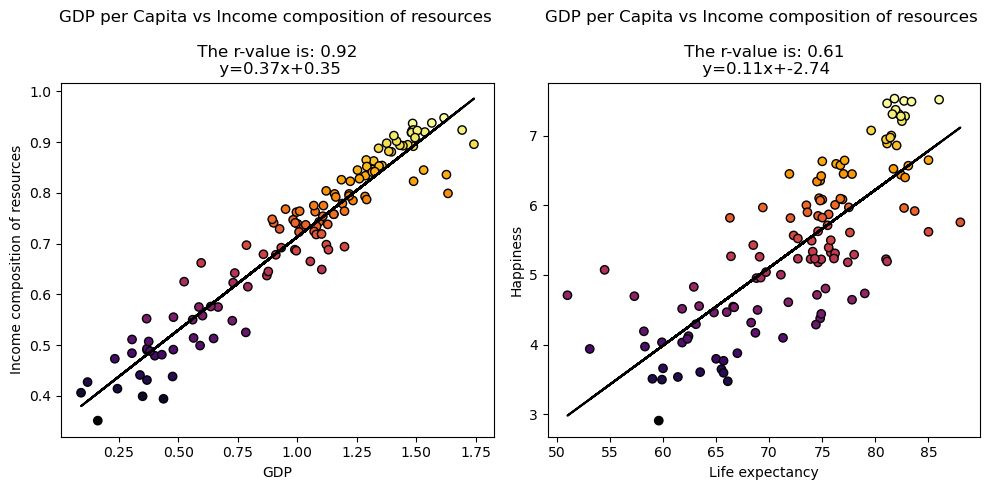

In [7]:
plt.rcParams["figure.figsize"] = (10,5)

plt.subplot(1,2,1)
# Linear regression
x_values = LH2015_dataf["gdp_per_capita"]
x_axis_label = "GDP"
y_values = LH2015_dataf["Income composition of resources"]
y_axis_label = "Income composition of resources"

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
def JRSfunc(x_values):
    return slope * x_values + intercept
regression_line = list(map(JRSfunc, x_values))

title = f"GDP per Capita vs Income composition of resources \n \n The r-value is: {rvalue**2:.2f} \n y={slope:.2f}x+{intercept:.2f}"
                      
# Incorporate the scatterplot
plt.scatter(x_values,y_values,marker ="o", c = y_values, edgecolors ="black",cmap = 'inferno')
plt.plot(x_values,regression_line,"k-")
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)

plt.subplot(1,2,2)
# Linear regression
x_values = LH2015_dataf["Life expectancy "]
x_axis_label = "Life expectancy"
y_values = LH2015_dataf["happiness_score"]
y_axis_label = "Happiness"

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
def JRSfunc(x_values):
    return slope * x_values + intercept
regression_line = list(map(JRSfunc, x_values))

title = f"GDP per Capita vs Income composition of resources \n \n The r-value is: {rvalue**2:.2f} \n y={slope:.2f}x+{intercept:.2f}"
                      
# Incorporate the scatterplot
plt.scatter(x_values,y_values,marker ="o", c = y_values, edgecolors ="black",cmap = 'inferno')
plt.plot(x_values,regression_line,"k-")
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)

#plt.savefig("..\output_data/NH TvL.png",bbox_inches='tight',dpi=100)
plt.tight_layout()
plt.show()

In [257]:
LH2015_developed = LH2015_dataf[["happiness_score","Status"]].copy()
population1 = LH2015_developed[LH2015_developed["Status"] == "Developing"]
population1.happiness_score.mean()
population2 = LH2015_developed[LH2015_developed["Status"] == "Developed"]
population2.happiness_score.mean()
print(population1.happiness_score.mean(), population2.happiness_score.mean())
# Calculate Independent (Two Sample) t-test
st.ttest_ind(population1.happiness_score, population2.happiness_score, equal_var=False)


5.11645160951613 6.446310355793104


Ttest_indResult(statistic=-7.124649410525367, pvalue=1.8570509687696105e-09)

In [9]:
population = LH2015_dataf.groupby("Status")
population.head(126)

Country  happiness_score  gdp_per_capita  family  health  freedom  \
0    Afghanistan             3.79            0.40    0.58    0.18     0.11   
1        Albania             4.64            1.00    0.80    0.73     0.38   
2        Algeria             5.87            1.09    1.15    0.62     0.23   
5      Argentina             6.60            1.19    1.44    0.70     0.49   
6        Armenia             4.38            0.90    1.01    0.64     0.20   
..           ...              ...             ...     ...     ...      ...   
175      Uruguay             6.45            1.22    1.41    0.72     0.58   
176   Uzbekistan             5.97            0.79    1.55    0.50     0.66   
180        Yemen             3.59            0.59    0.94    0.31     0.25   
181       Zambia             4.51            0.64    1.00    0.26     0.46   
182     Zimbabwe             3.88            0.38    1.08    0.20     0.34   

     generosity  government_trust  dystopia_residual      continent  ...  \
0          0.31              0.06               2.15           Asia  ...   
1          0.20              0.04               1.49         Europe  ...   
2          0.07              0.15               2.57         Africa  ...   
5          0.11              0.06               2.61  South America  ...   
6          0.08              0.03               1.52           Asia  ...   
..          ...               ...                ...            ...  ...   
175        0.18              0.18               2.17  South America  ...   
176        0.42              0.25               1.82           Asia  ...   
180        0.10              0.06               1.35           Asia  ...   
181        0.25              0.08               1.83         Africa  ...   
182        0.19              0.10               1.60         Africa  ...   

     Polio  Total expenditure  Diphtheria    HIV/AIDS       GDP    Population  \
0     6.00               8.16        65.00       0.10    584.26 33,736,494.00   
1    99.00               6.00        99.00       0.10  3,954.23     28,873.00   
2    95.00                NaN        95.00       0.10  4,132.76 39,871,528.00   
5    93.00                NaN        94.00       0.10 13,467.12 43,417,765.00   
6    96.00                NaN        94.00       0.10    369.65    291,695.00   
..     ...                ...          ...        ...       ...           ...   
175  95.00                NaN        95.00       0.10 15,524.84  3,431,552.00   
176  99.00                NaN        99.00       0.10  2,137.58    312,989.00   
180  63.00                NaN        69.00       0.10       NaN           NaN   
181   9.00                NaN         9.00       4.10  1,313.89    161,587.00   
182  88.00                NaN        87.00       6.20    118.69 15,777,451.00   

      thinness  1-19 years   thinness 5-9 years  \
0                    17.20                17.30   
1                     1.20                 1.30   
2                     6.00                 5.80   
5                     1.00                 0.90   
6                     2.10                 2.20   
..                     ...                  ...   
175                   1.50                 1.40   
176                   3.00                 3.10   
180                  13.60                13.40   
181                   6.30                 6.10   
182                   5.60                 5.50   

     Income composition of resources  Schooling  
0                               0.48      10.10  
1                               0.76      14.20  
2                               0.74      14.40  
5                               0.83      17.30  
6                               0.74      12.70  
..                               ...        ...  
175                             0.79      15.50  
176                             0.70      12.10  
180                             0.50       9.00  
181                             0.58      12.50  
182                    

In [10]:
years=LH_dataf.loc[:,["Year_x","Life expectancy "]].groupby("Year_x").mean().reset_index().sort_values("Life expectancy ",ascending=False)["Year_x"].values.tolist()
print(years)

[2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0]


In [65]:
data_money = LH_dataf[["Year_y","Year_x","Country","happiness_score","gdp_per_capita","generosity","Life expectancy ","Income composition of resources"]]
#data_money["Year_x"] = data_money["Year_x"].map("{:.0f}".format)
data_money.set_index("Year_x")
data_money_clean = data_money.drop_duplicates(keep=False)
data_money_clean.dropna()
data_money_clean.set_index("Year_x").sort_values("Country")
data_money_clean.happiness_score.duplicated().sum()

11019

['2015', '2016', '2017', '2018', '2019', '2020']


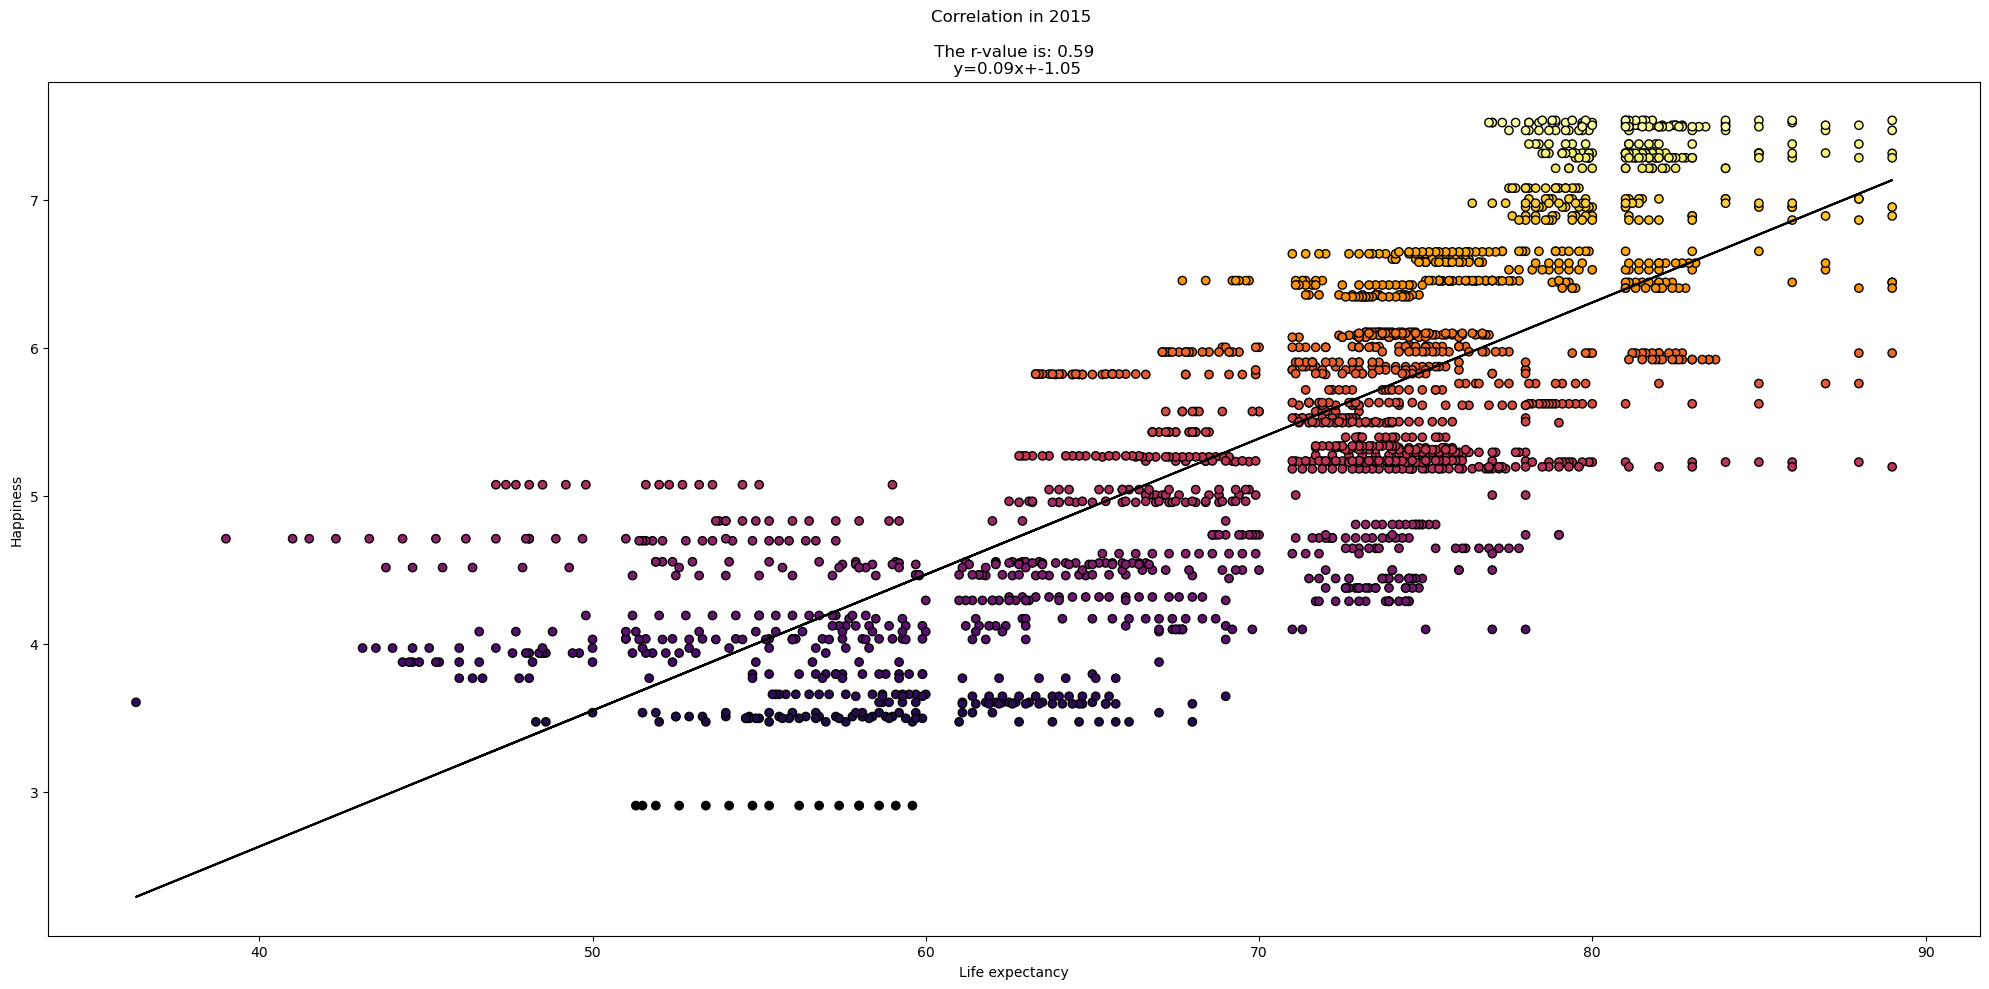

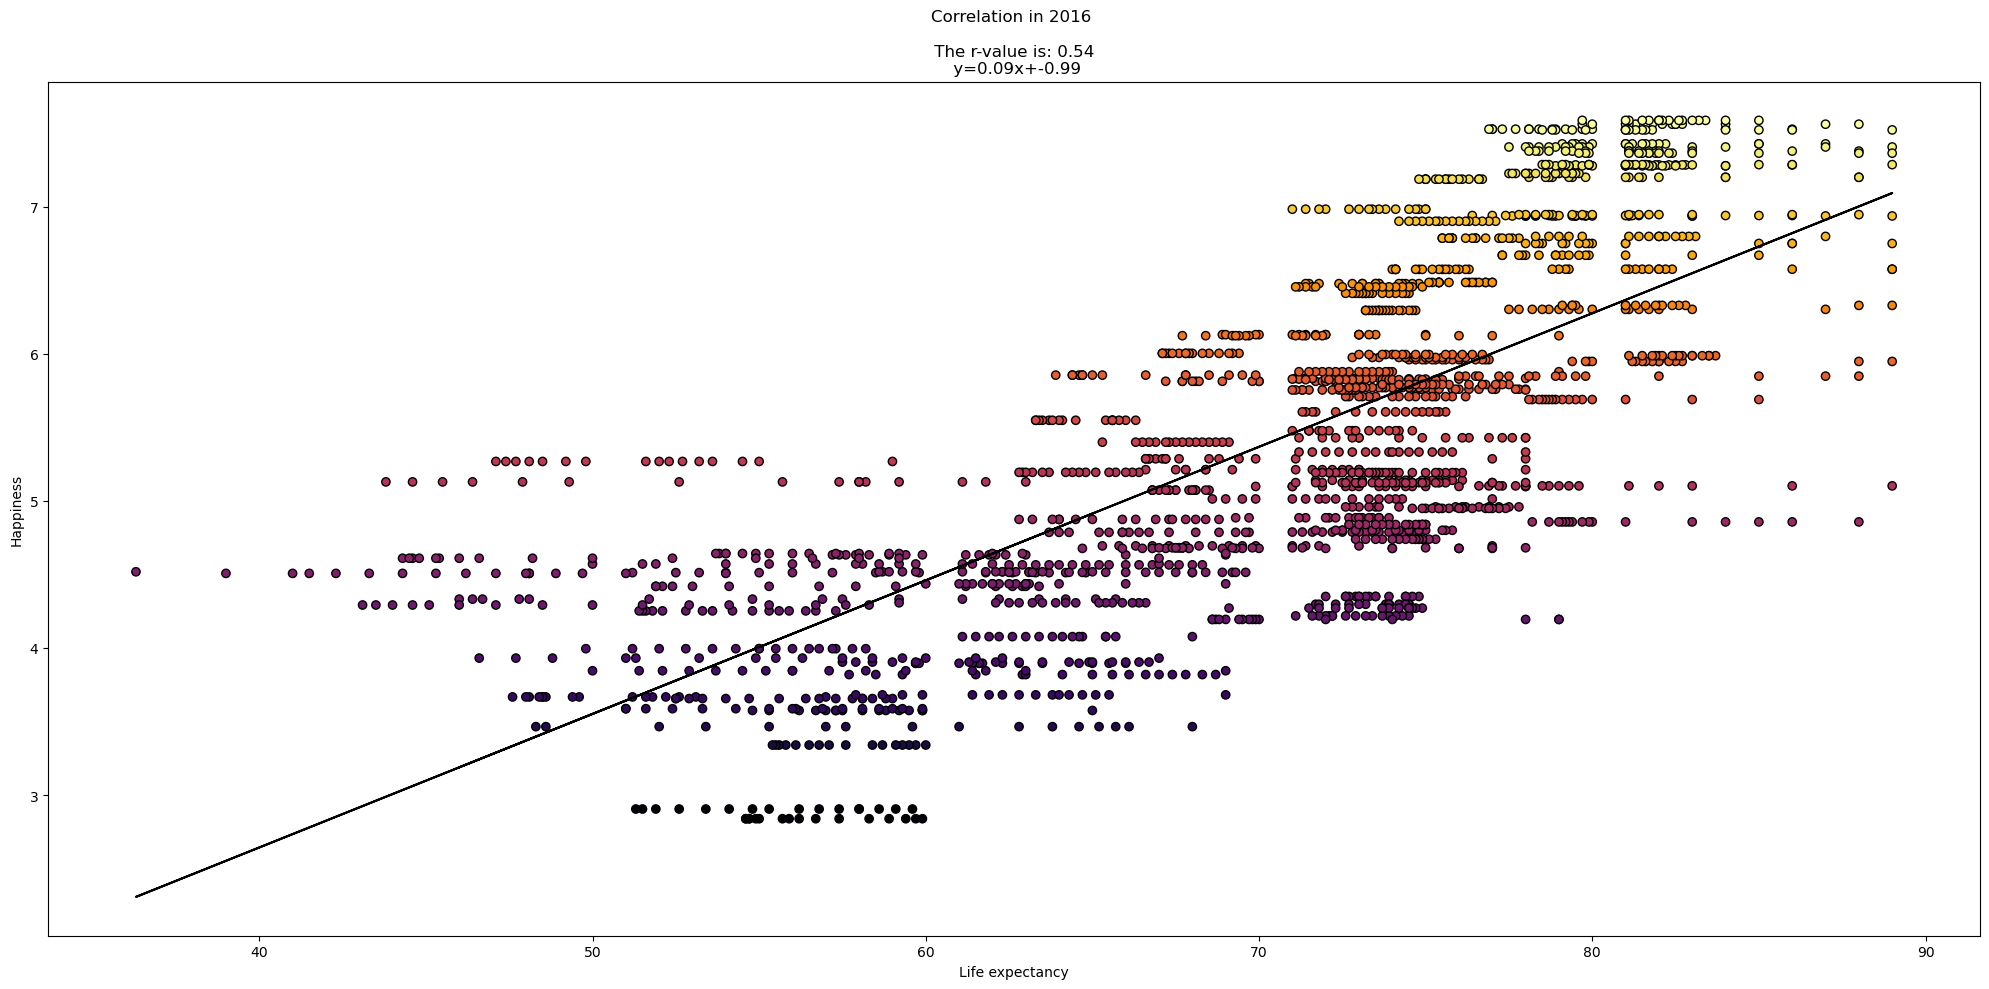

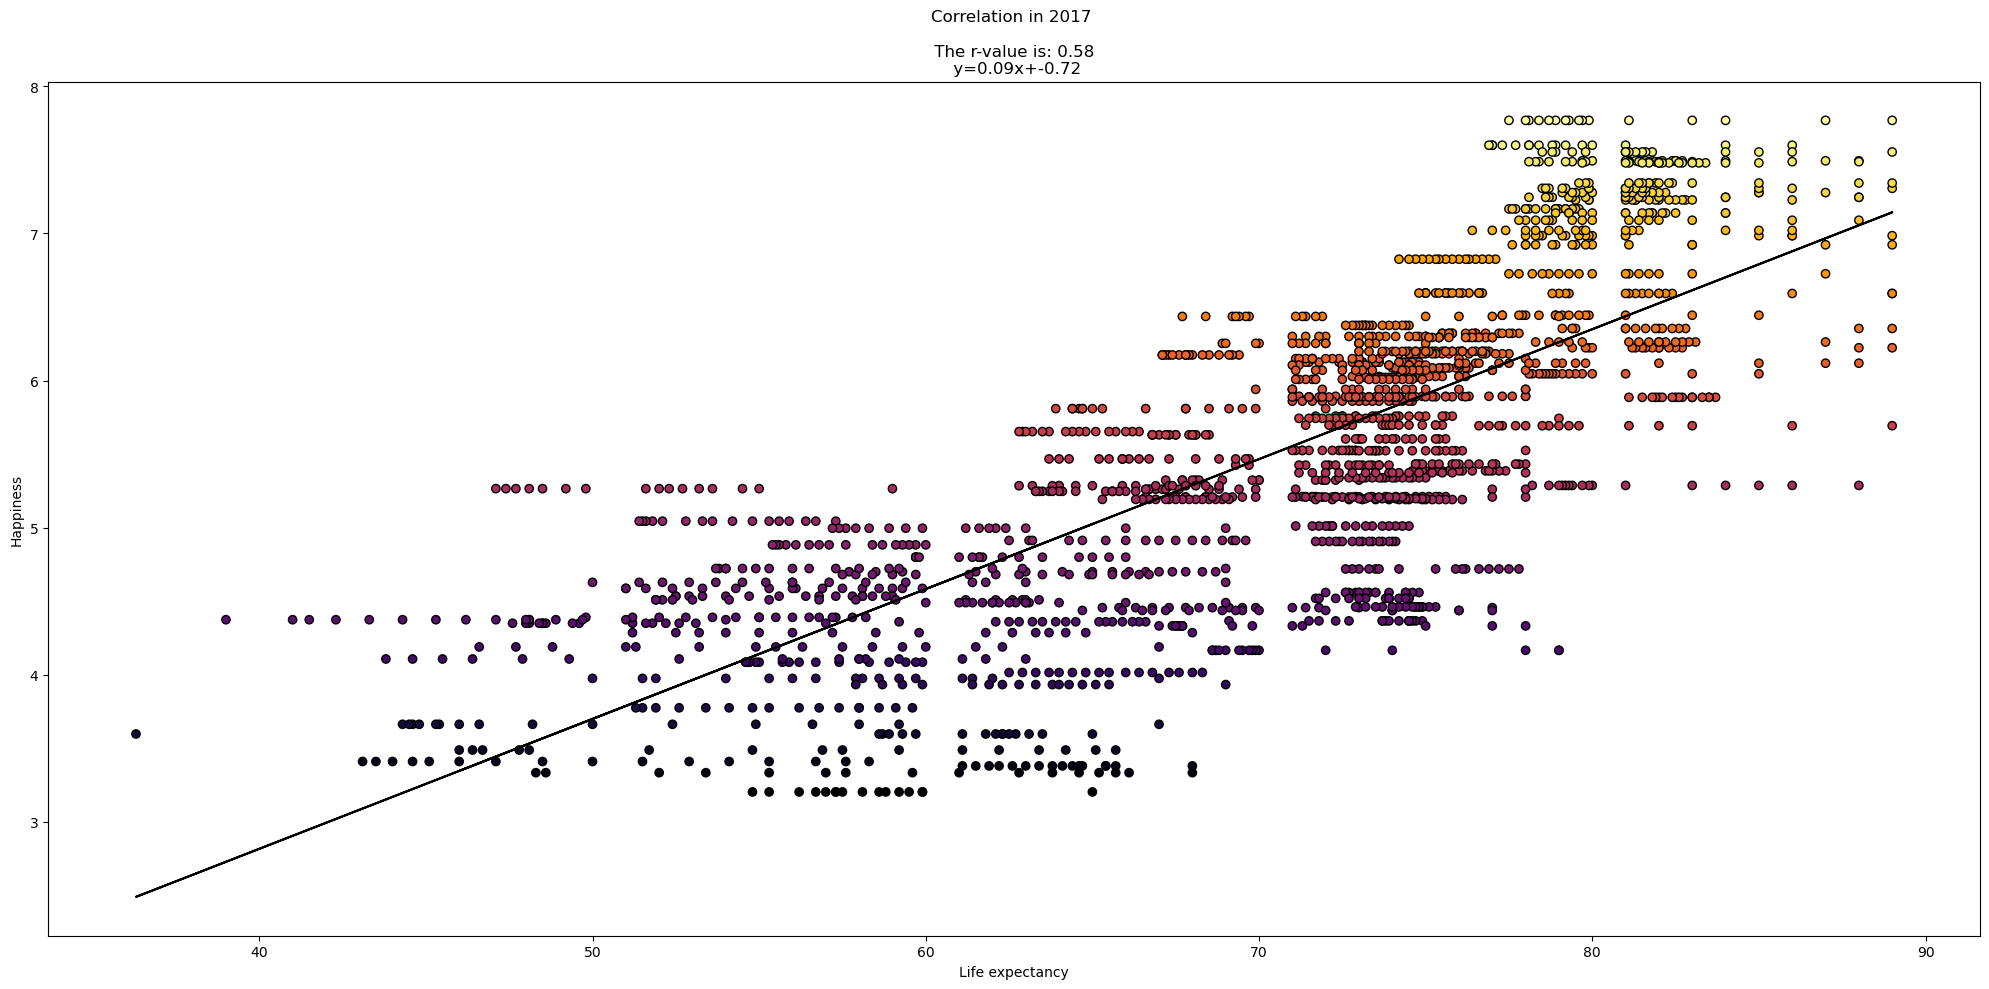

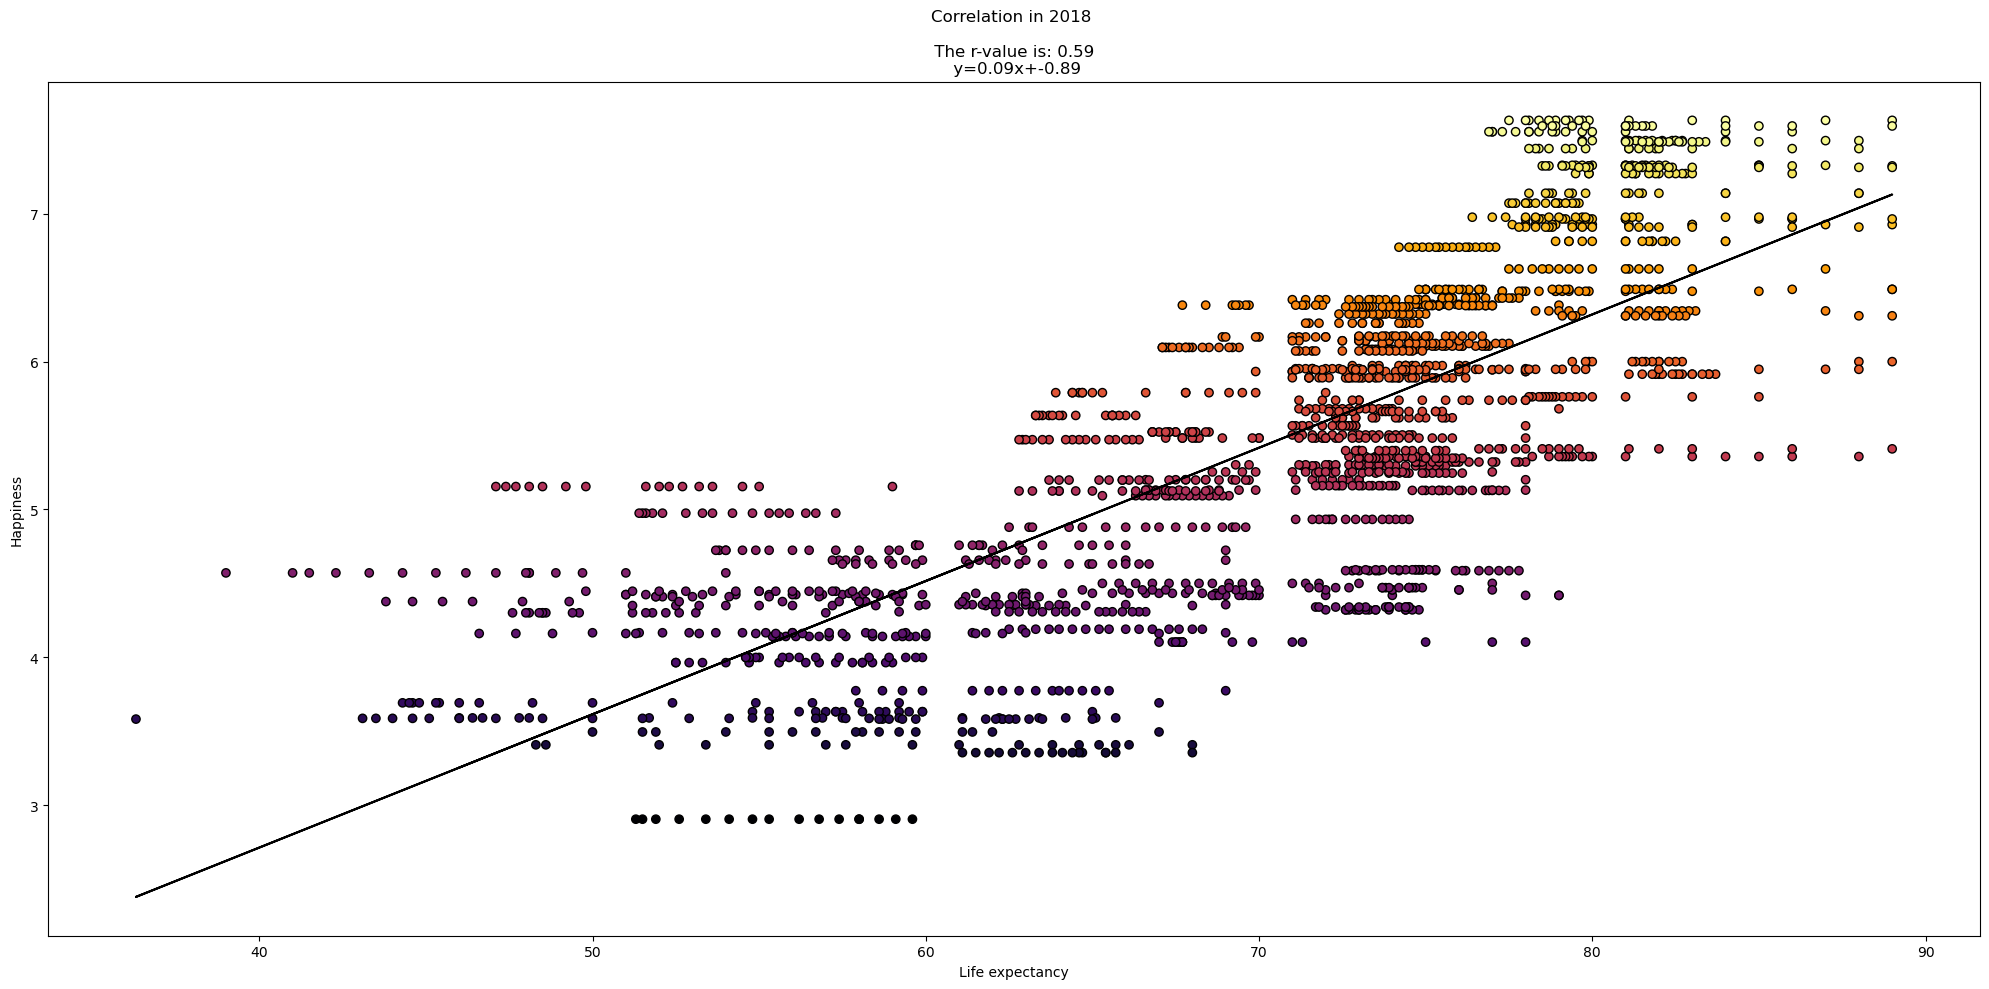

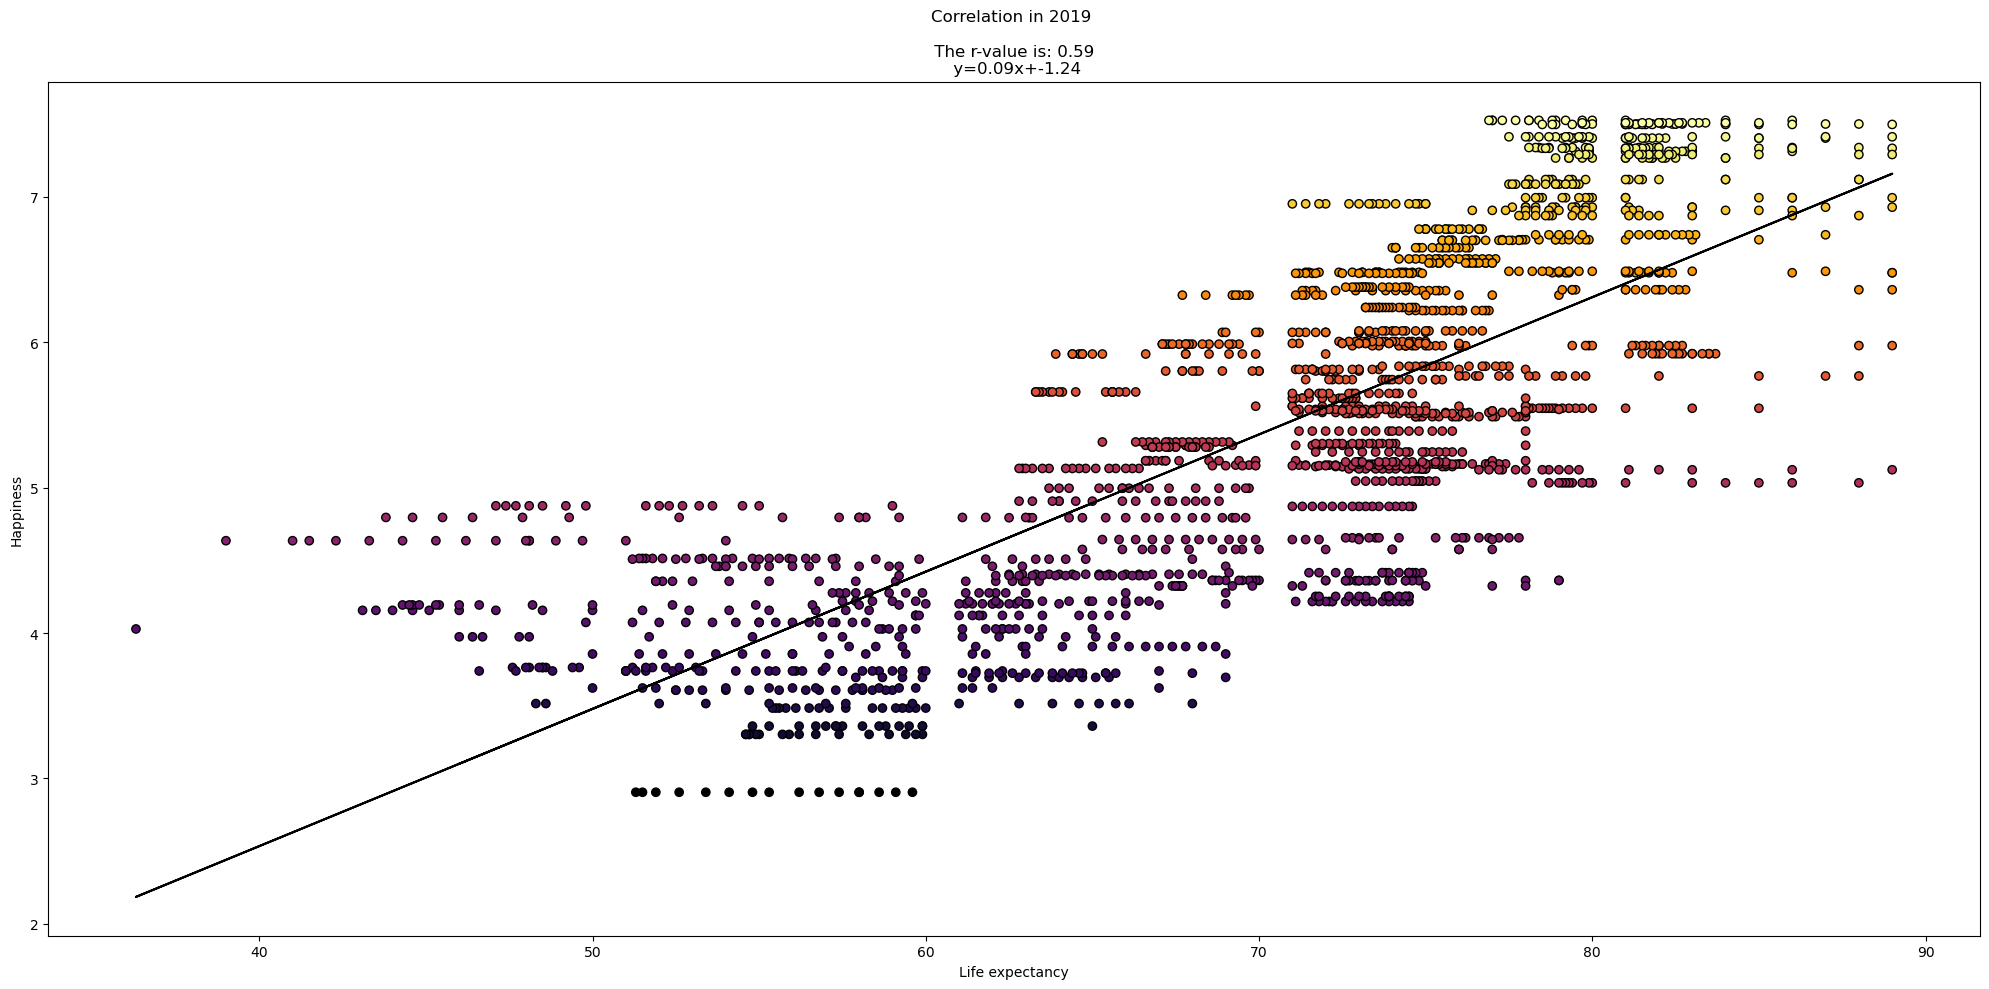

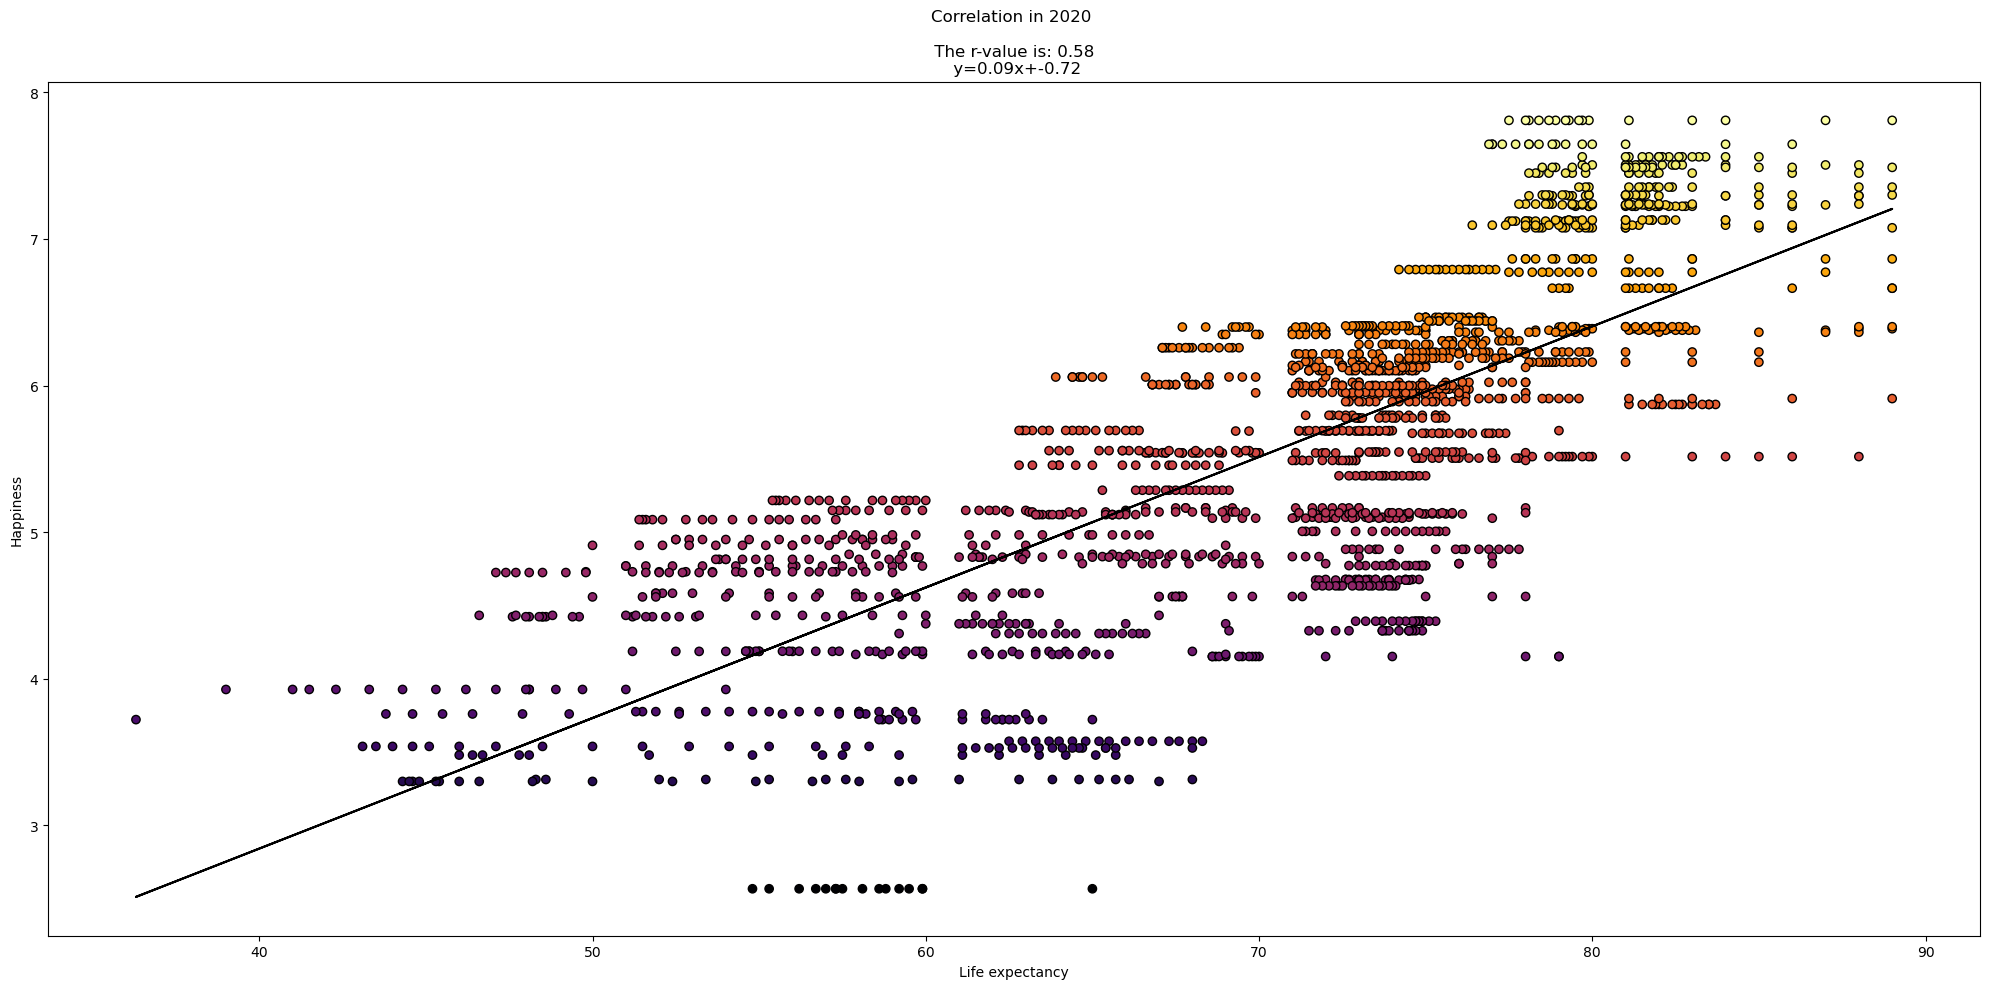

In [28]:
years=data_money_clean.loc[:,["Year_x","Life expectancy "]].groupby("Year_x").mean().reset_index().sort_values("Life expectancy ",ascending=False)["Year_x"].values.tolist()
print(years)

# loop through each year
for year in years: 
    # select data for each year
    data_year = data_money_clean[data_money_clean["Year_x"]==year]
    
    plt.figure(figsize=(20,10))

    # Linear regression
    x_values = data_year["Life expectancy "]
    x_axis_label = "Life expectancy"
    y_values = data_year["happiness_score"]
    y_axis_label = "Happiness"

    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    def JRSfunc(x_values):
        return slope * x_values + intercept
    regression_line = list(map(JRSfunc, x_values))

    title = f"Correlation in {year} \n \n The r-value is: {rvalue**2:.2f} \n y={slope:.2f}x+{intercept:.2f}"

    # Incorporate the scatterplot
    plt.scatter(x_values,y_values,marker ="o", c = y_values, edgecolors ="black",cmap = 'inferno')
    plt.plot(x_values,regression_line,"k-")
    plt.title(title)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)

    plt.tight_layout()
    plt.show()

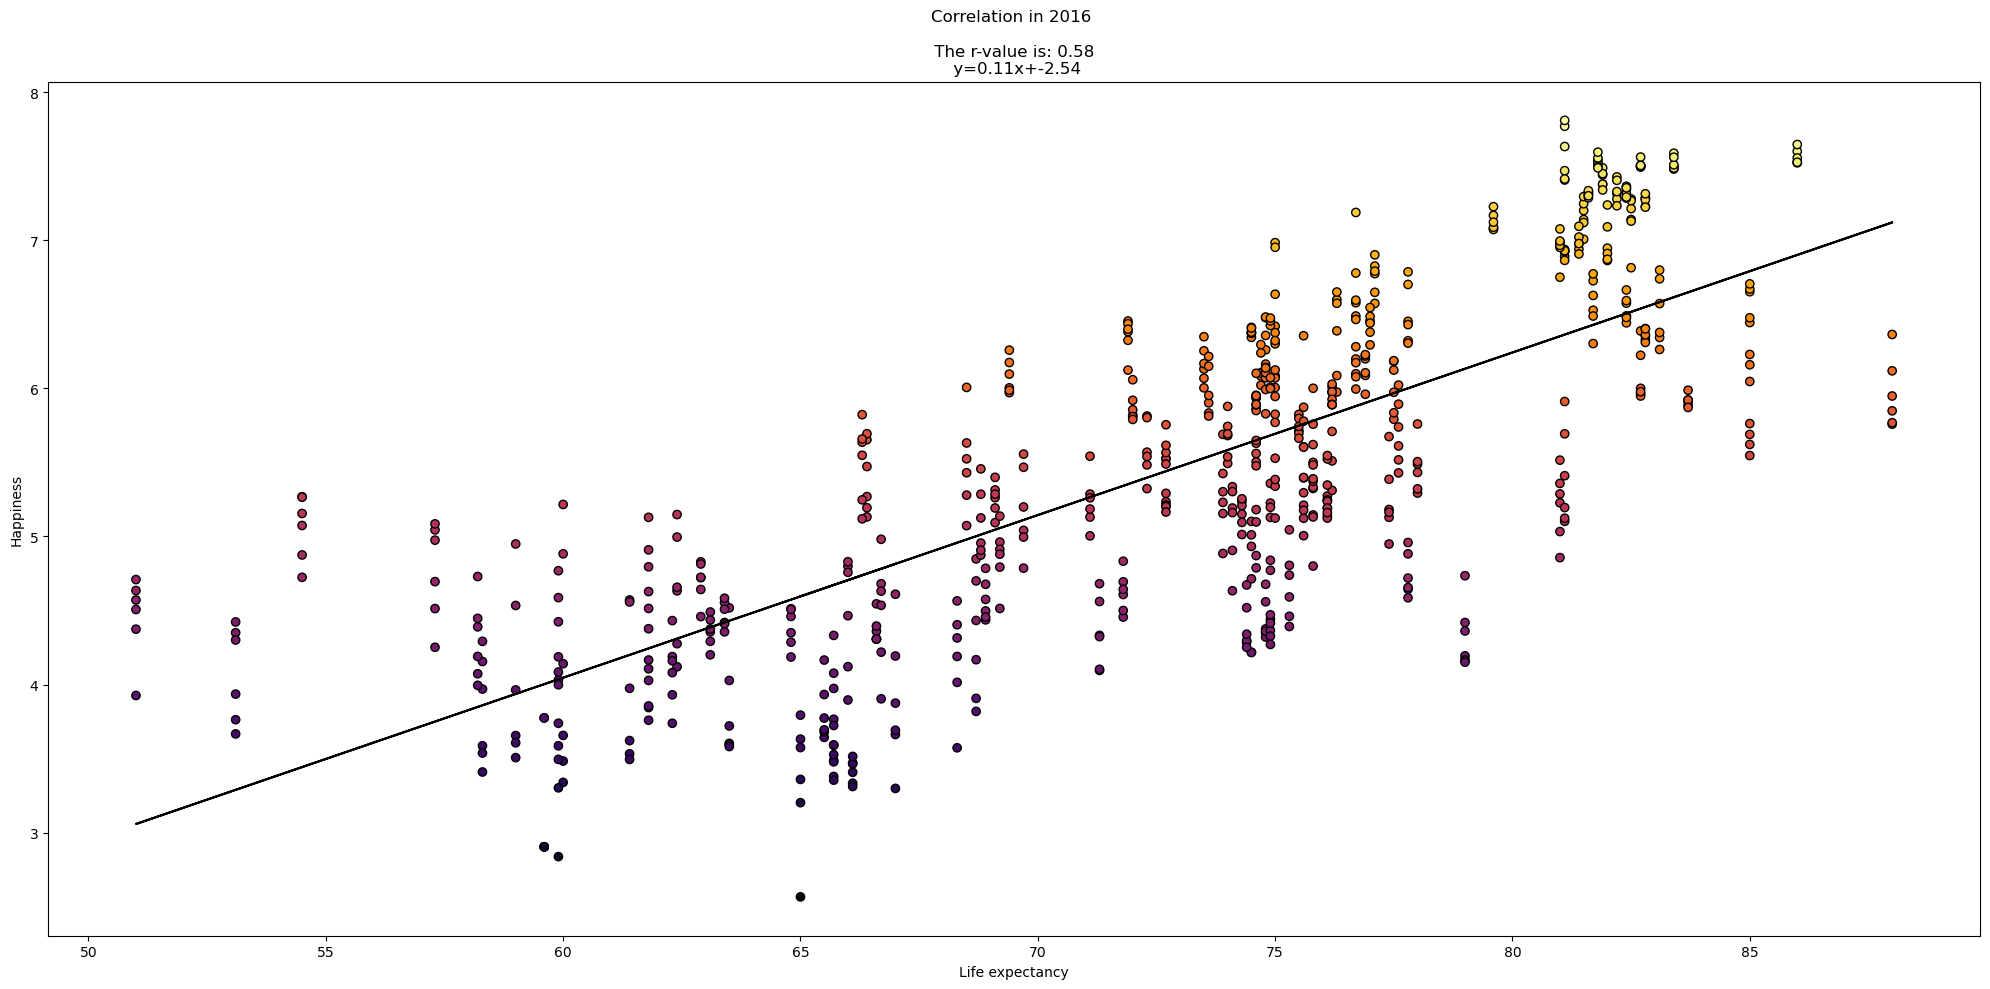

In [122]:
# select data for each year
data_year = data_money_clean[data_money_clean["Year_y"]==2015]

plt.figure(figsize=(20,10))

# Linear regression
x_values = data_year["Life expectancy "]
x_axis_label = "Life expectancy"
y_values = data_year["happiness_score"]
y_axis_label = "Happiness"

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
def JRSfunc(x_values):
    return slope * x_values + intercept
regression_line = list(map(JRSfunc, x_values))

title = f"Correlation in {year} \n \n The r-value is: {rvalue**2:.2f} \n y={slope:.2f}x+{intercept:.2f}"

# Incorporate the scatterplot
plt.scatter(x_values,y_values,marker ="o", c = y_values, edgecolors ="black",cmap = 'inferno')
plt.plot(x_values,regression_line,"k-")
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)

plt.tight_layout()
plt.show()

In [50]:
data_year = data_money_clean[data_money_clean["Year_x"]=="2015"]
data_year

Empty DataFrame
Columns: [Year_x, Country, happiness_score, gdp_per_capita, generosity, Life expectancy , Income composition of resources]
Index: []

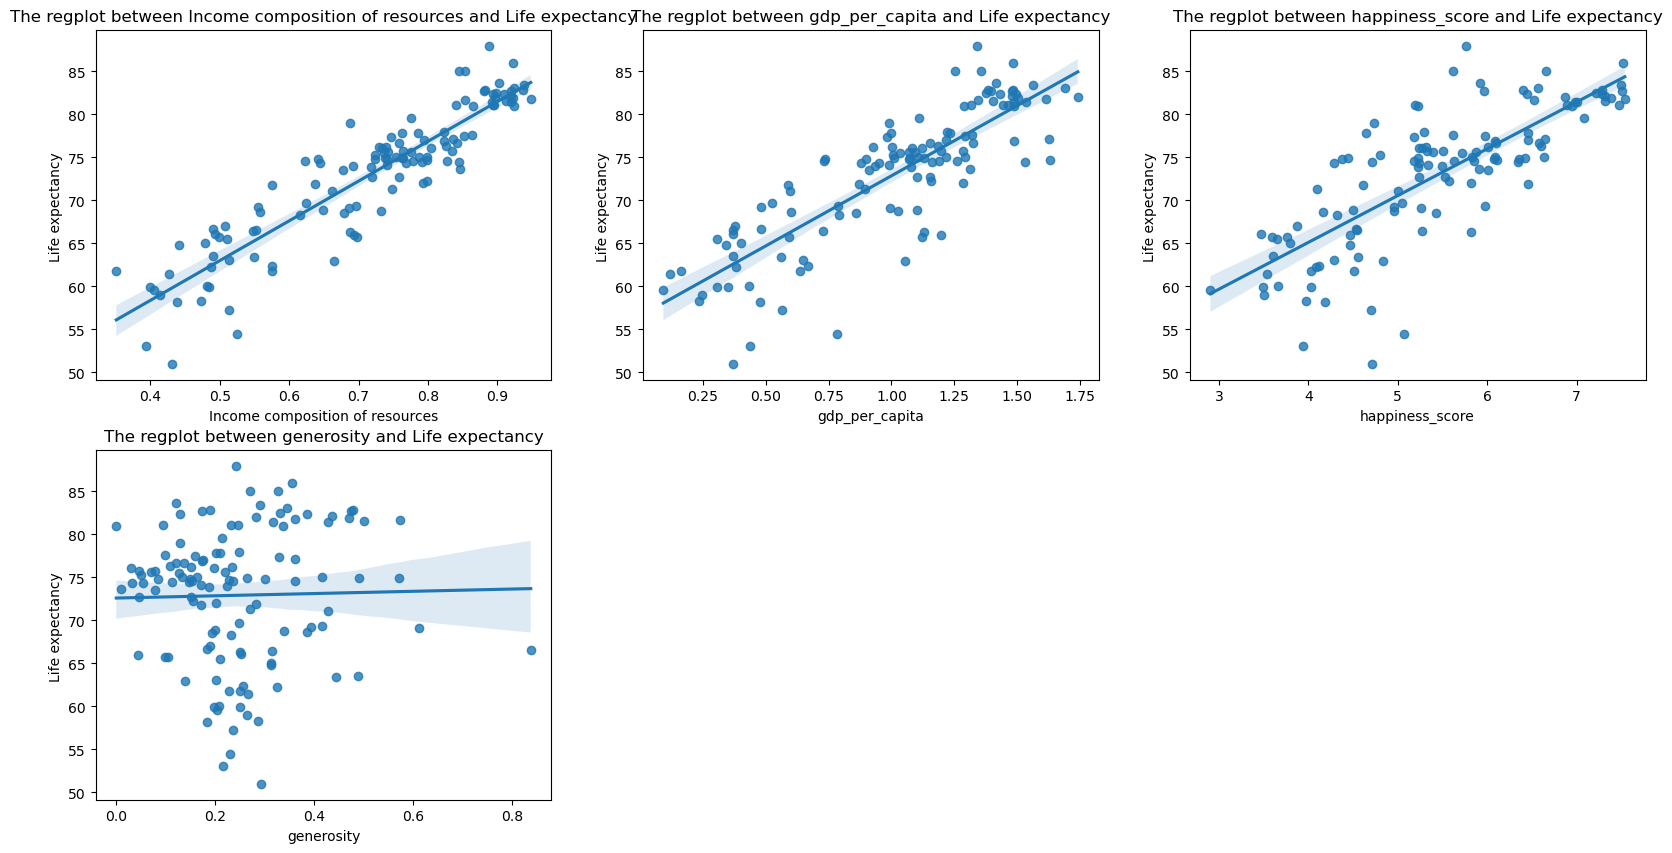

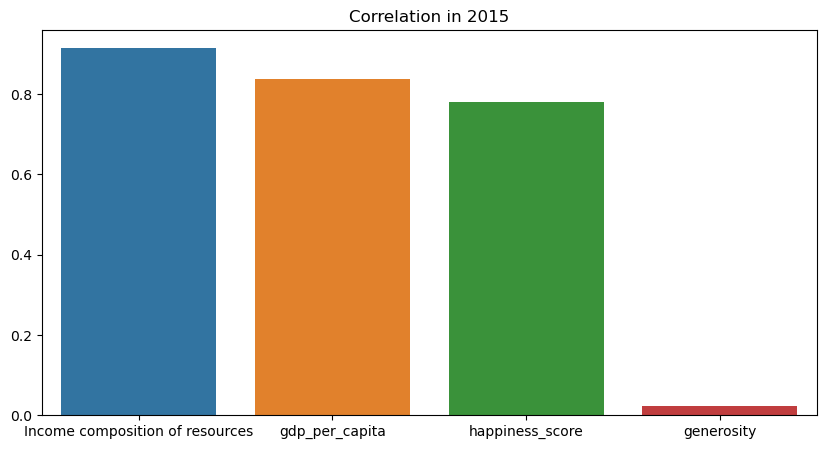

In [60]:
data_money = LH2015_dataf[["Year_y","Country","happiness_score","gdp_per_capita","generosity","Life expectancy ","Income composition of resources"]]
data_money["Year_y"] = data_money["Year_y"].map("{:.0f}".format)
data_money.set_index("Year_y")


# select data for this country
data_2015=data_money[data_money["Year_y"]=="2015"] 
# Calculate the correlation between the country's life expectancy and other fields, and sort them in descending order, and finally return the field name
columns_high=data_2015.corr().fillna(0).reset_index().loc[:,["index","Life expectancy "]].sort_values(by="Life expectancy ",ascending=False)["index"].values.tolist() 
# Calculate the correlation between the life of this country and other fields, and sort them in descending order, and finally return the value of life
values=data_2015.corr().fillna(0).reset_index().loc[:,["index","Life expectancy "]].sort_values(by="Life expectancy ",ascending=False)["Life expectancy "].values.tolist()  
# Get the first six fields
columns_high=columns_high[1:7]
# Take the first six life expectancy
values=values[1:7]  
plt.figure(figsize=(20,10))
for i,column in enumerate(columns_high):
    plt.subplot(2,3,i+1)
    # Draw a linear graph of this field and lifetime
    seaborn.regplot(x=column,y="Life expectancy ",data=data_2015)  
    plt.title(f"The regplot between {column} and Life expectancy")
plt.savefig(f"output_data/2015 regplot.png")
plt.figure(figsize=(10,5))
# field and lifetime correlation bar chart
seaborn.barplot(x=columns_high,y=values)  
plt.title(f"Correlation in 2015")
plt.savefig(f"output_data/2015 corr.png")

In [61]:
years=data_money_clean.loc[:,["Year_x","Life expectancy "]].groupby("Year_x").mean().reset_index().sort_values("Life expectancy ",ascending=False)["Year_x"].values.tolist()
print(years)

# loop through each year
#for year in years: 
    # select data for this country
    data_2015=data_money[data_money["Year_y"]=="2015"] 
    # Calculate the correlation between the country's life expectancy and other fields, and sort them in descending order, and finally return the field name
    columns_high=data_2015.corr().fillna(0).reset_index().loc[:,["index","Life expectancy "]].sort_values(by="Life expectancy ",ascending=False)["index"].values.tolist() 
    # Calculate the correlation between the life of this country and other fields, and sort them in descending order, and finally return the value of life
    values=data_2015.corr().fillna(0).reset_index().loc[:,["index","Life expectancy "]].sort_values(by="Life expectancy ",ascending=False)["Life expectancy "].values.tolist()  
    # Get the first six fields
    columns_high=columns_high[1:7]
    # Take the first six life expectancy
    values=values[1:7]  
    plt.figure(figsize=(20,10))
    for i,column in enumerate(columns_high):
        plt.subplot(2,3,i+1)
        # Draw a linear graph of this field and lifetime
        seaborn.regplot(x=column,y="Life expectancy ",data=data_2015)  
        plt.title(f"The regplot between {column} and Life expectancy")
    plt.savefig(f"output_data/2015 regplot.png")
    plt.figure(figsize=(10,5))
    # field and lifetime correlation bar chart
    seaborn.barplot(x=columns_high,y=values)  
    plt.title(f"Correlation in 2015")
    plt.savefig(f"output_data/2015 corr.png")

[2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0]


In [124]:
data_money = LH2015_dataf[["Country","Status","happiness_score","gdp_per_capita","generosity","Life expectancy ","Income composition of resources"]]
#data_money["Year_x"] = data_money["Year_x"].map("{:.0f}".format)
#data_money.set_index("Year_x")
#data_money_clean = data_money.drop_duplicates(keep=False)
#data_money_clean.dropna()
#data_money_clean.set_index("Year_x").sort_values("Country")
#data_money_clean.happiness_score.duplicated().sum()
data_money

Country      Status  happiness_score  gdp_per_capita  generosity  \
0    Afghanistan  Developing             3.79            0.40        0.31   
1        Albania  Developing             4.64            1.00        0.20   
2        Algeria  Developing             5.87            1.09        0.07   
5      Argentina  Developing             6.60            1.19        0.11   
6        Armenia  Developing             4.38            0.90        0.08   
..           ...         ...              ...             ...         ...   
175      Uruguay  Developing             6.45            1.22        0.18   
176   Uzbekistan  Developing             5.97            0.79        0.42   
180        Yemen  Developing             3.59            0.59        0.10   
181       Zambia  Developing             4.51            0.64        0.25   
182     Zimbabwe  Developing             3.88            0.38        0.19   

     Life expectancy   Income composition of resources  
0               65.00                             0.48  
1               77.80                             0.76  
2               75.60                             0.74  
5               76.30                             0.83  
6               74.80                             0.74  
..                ...                              ...  
175             77.00                             0.79  
176             69.40                             0.70  
180             65.70                             0.50  
181             61.80                             0.58  
182             67.00                             0.51  

[122 rows x 7 columns]

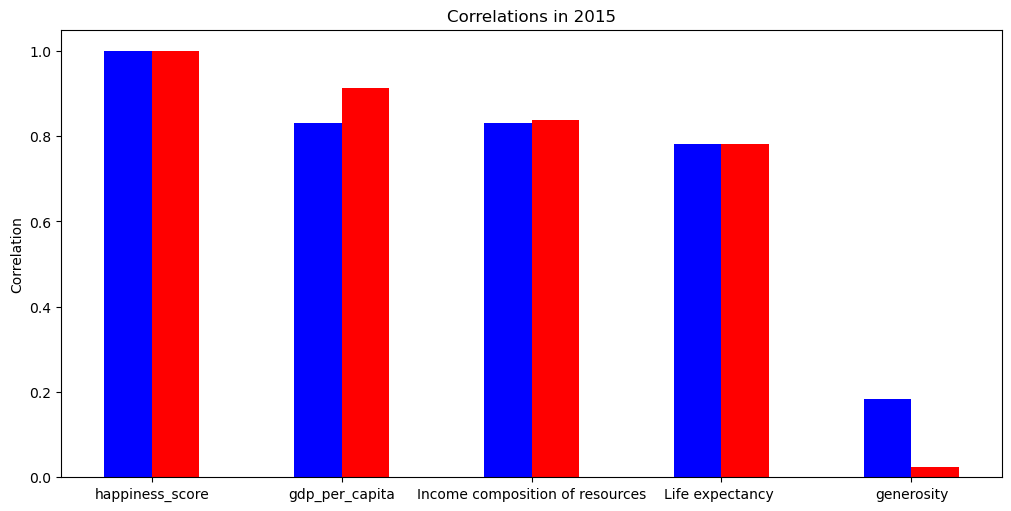

In [120]:

# Calculate the correlation between the country's life expectancy and other fields, and sort them in descending order, and finally return the field name
x_axis1=data_money.corr().fillna(0).reset_index().loc[:,["index","happiness_score"]].sort_values(by="happiness_score",ascending=False)["index"].values.tolist()
#x_axis2=data_money.corr().fillna(0).reset_index().loc[:,["index","Life expectancy "]].sort_values(by="Life expectancy ",ascending=False)["index"].values.tolist()
# Calculate the correlation between the life of this country and other fields, and sort them in descending order, and finally return the value of life
y_axis1=data_money.corr().fillna(0).reset_index().loc[:,["index","happiness_score"]].sort_values(by="happiness_score",ascending=False)["happiness_score"].values.tolist()  
y_axis2=data_money.corr().fillna(0).reset_index().loc[:,["index","Life expectancy "]].sort_values(by="Life expectancy ",ascending=False)["Life expectancy "].values.tolist()  

# Set position of bar on X axis
barWidth = 0.25
fig = plt.subplots(layout='constrained')

bar1 = np.arange(len(y_axis1))
bar2 = [x + barWidth for x in bar1]

#plt.savefig(f"output_data/{year} regplot.png")
#plt.figure(figsize=(10,5))
# field and lifetime correlation bar chart
plt.bar(bar1,y_axis1, color ="b", width = barWidth)
plt.bar(bar2,y_axis2, color ="r", width = barWidth)
plt.ylabel('Correlation')
plt.xticks(bar1+.125, x_axis1)
plt.title(f"Correlations in 2015")
plt.savefig(f"output_data/2015 corr happiness.png")

In [77]:
data_mondey = data_money_clean[data_money_clean["Year_y"]==2015]
data_mondey

Year_y Year_x      Country  happiness_score  gdp_per_capita  \
0        2015   2015  Afghanistan             3.79            0.40   
1        2015   2016  Afghanistan             3.58            0.32   
2        2015   2017  Afghanistan             3.20            0.35   
3        2015   2018  Afghanistan             3.63            0.33   
4        2015   2019  Afghanistan             3.36            0.38   
...       ...    ...          ...              ...             ...   
12603    2015   2016     Zimbabwe             4.61            0.27   
12604    2015   2017     Zimbabwe             3.66            0.37   
12605    2015   2018     Zimbabwe             3.69            0.36   
12606    2015   2019     Zimbabwe             4.19            0.35   
12607    2015   2020     Zimbabwe             3.30            0.43   

       generosity  Life expectancy   Income composition of resources  
0            0.31             65.00                             0.48  
1            0.37             65.00                             0.48  
2            0.16             65.00                             0.48  
3            0.19             65.00                             0.48  
4            0.31             65.00                             0.48  
...           ...               ...                              ...  
12603        0.19             67.00                             0.51  
12604        0.15             67.00                             0.51  
12605        0.13             67.00                             0.51  
12606        0.19             67.00                             0.51  
12607        0.15             67.00                             0.51  

[732 rows x 8 columns]

['2020', '2017', '2018', '2015', '2019', '2016']


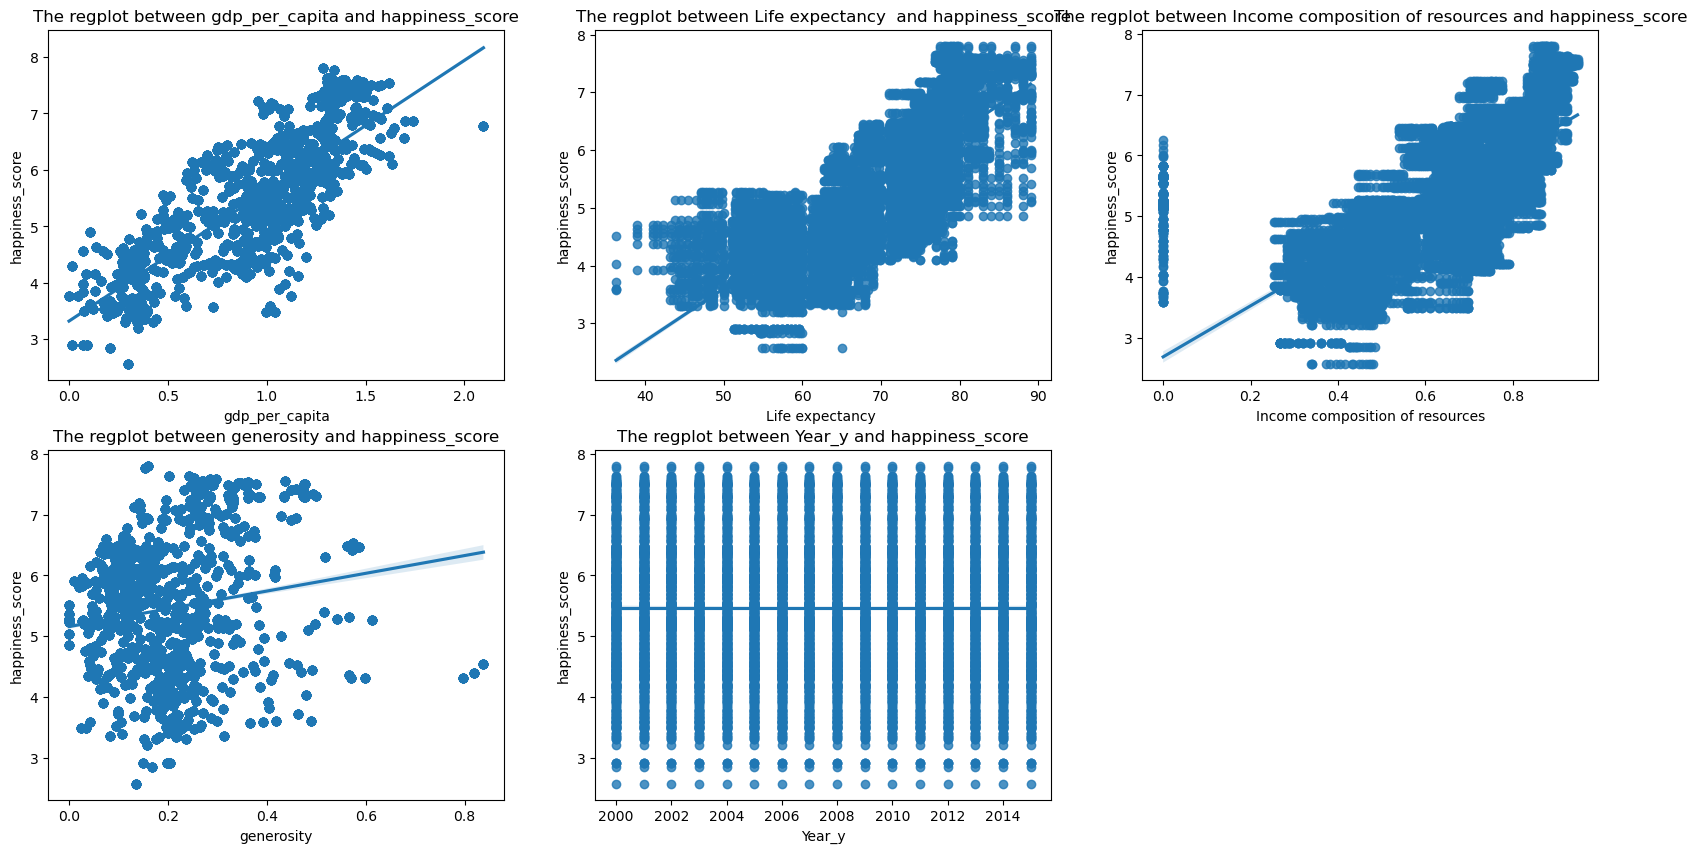

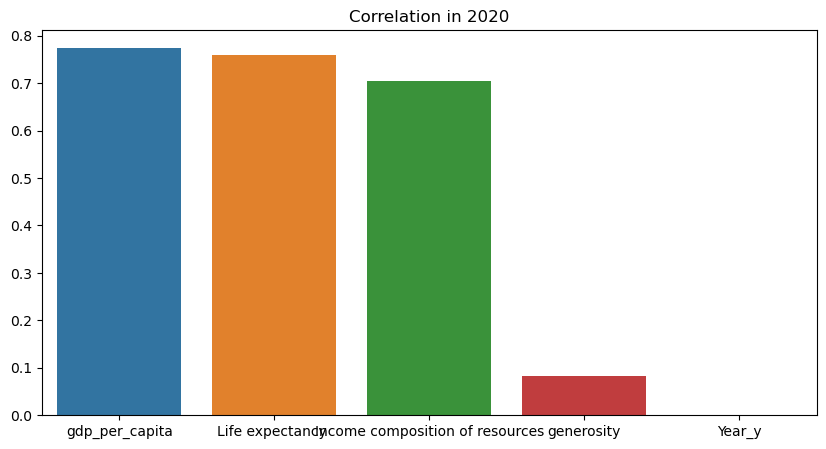

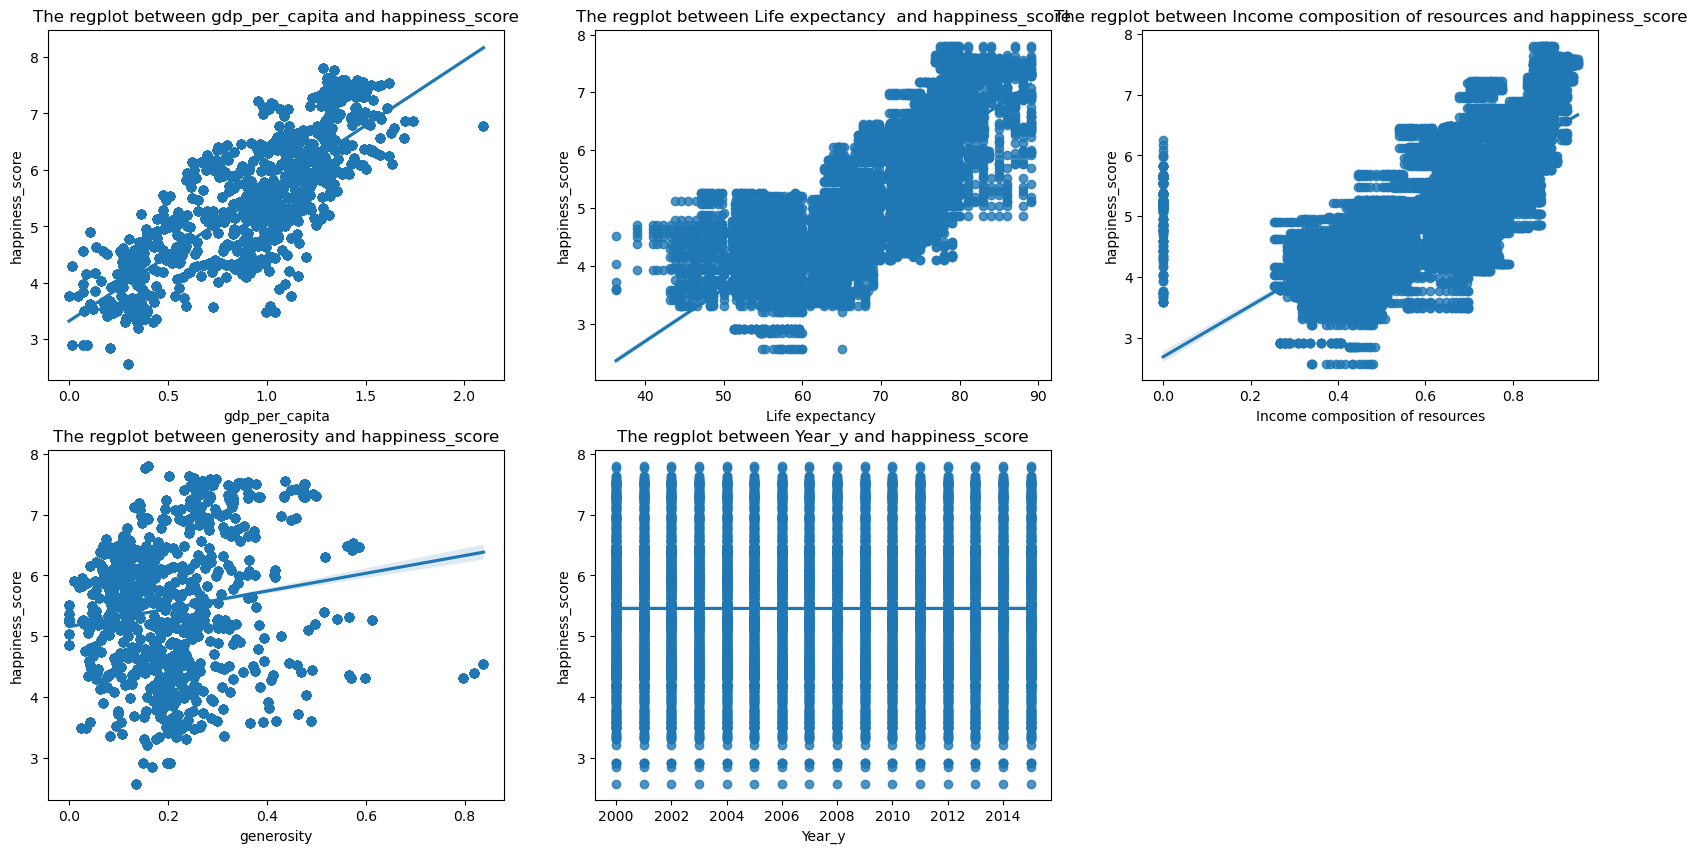

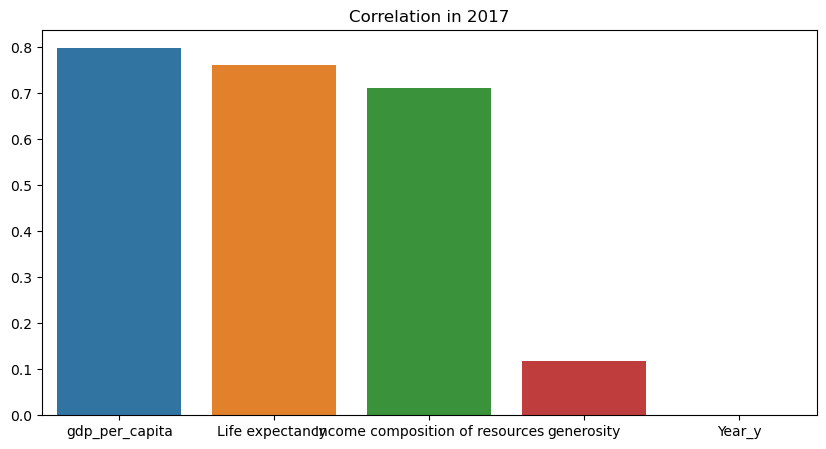

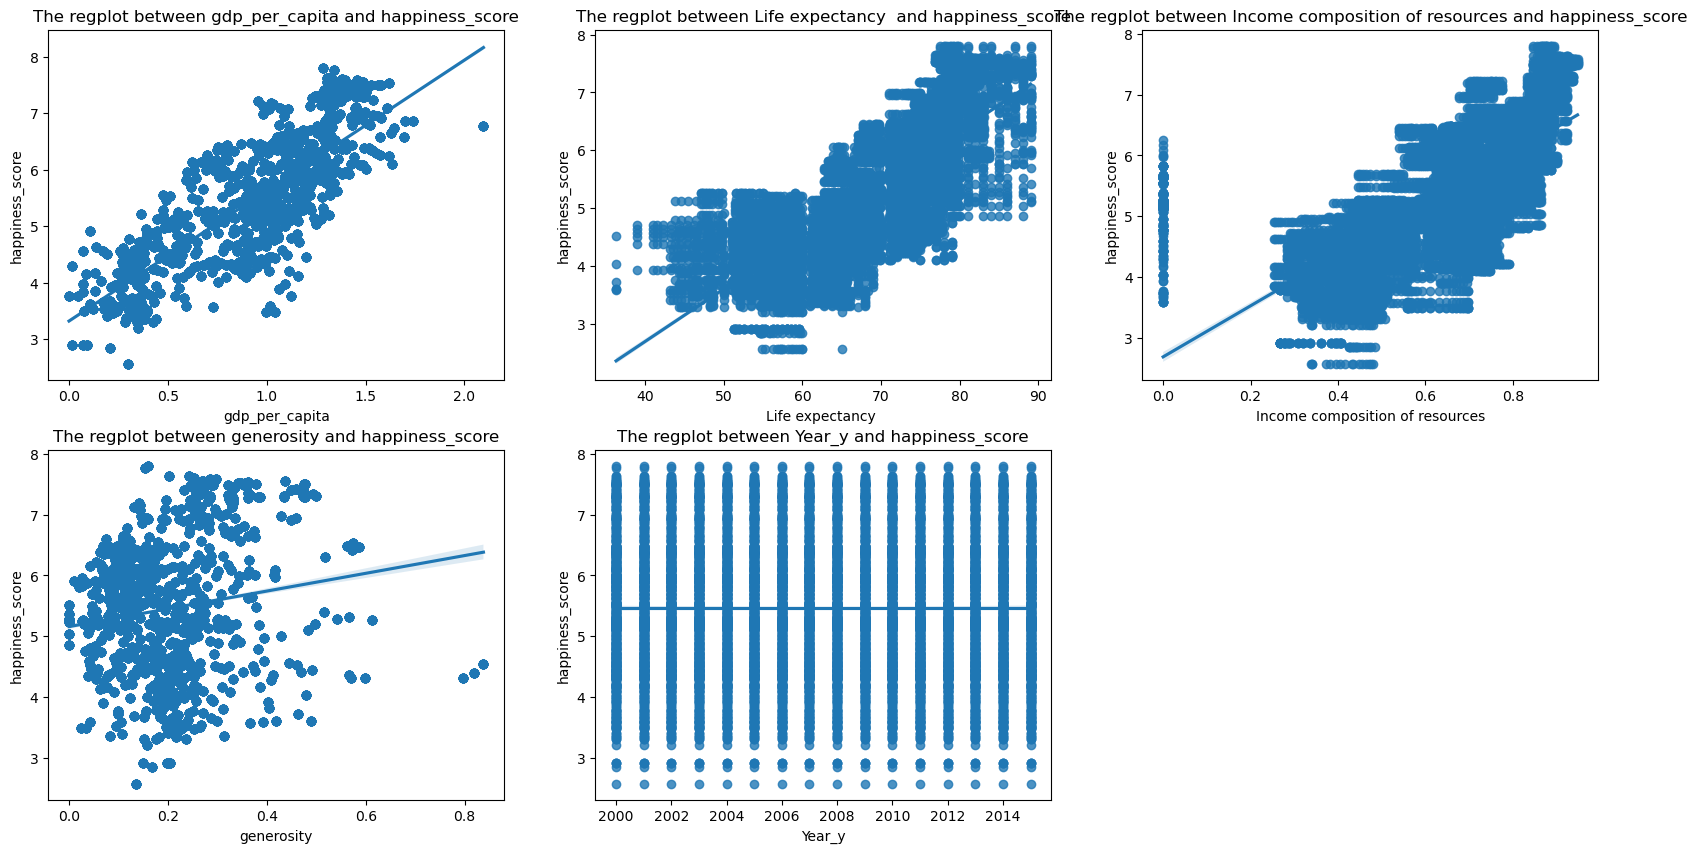

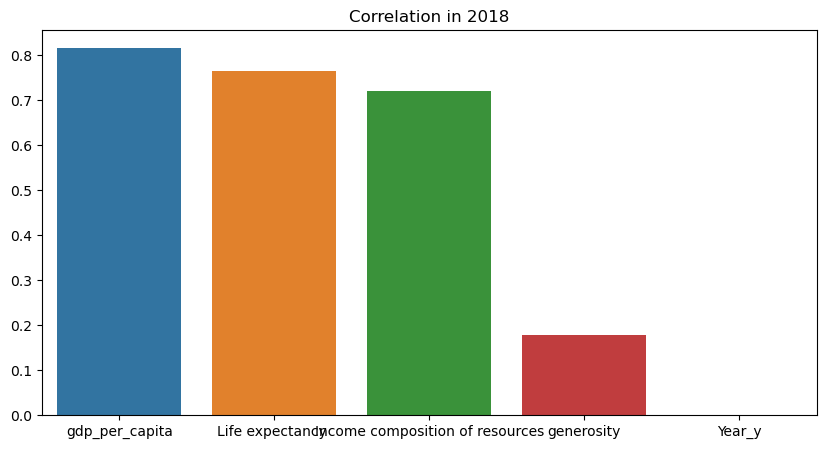

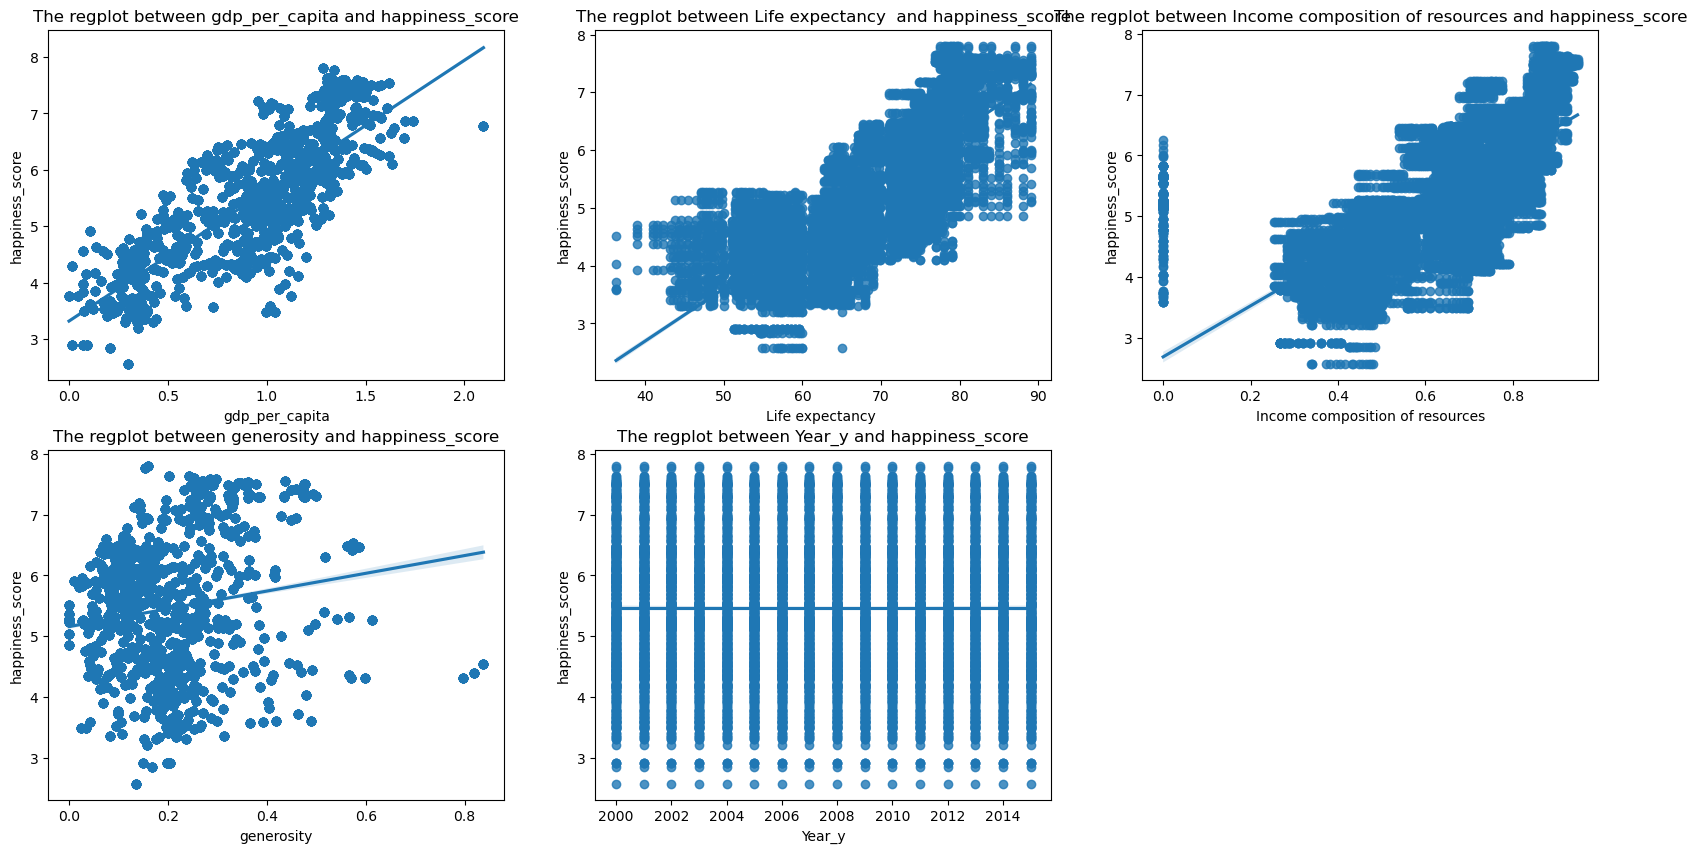

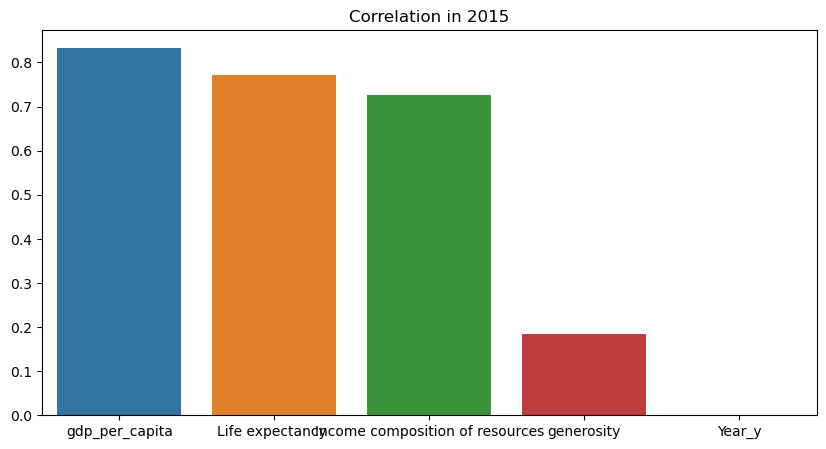

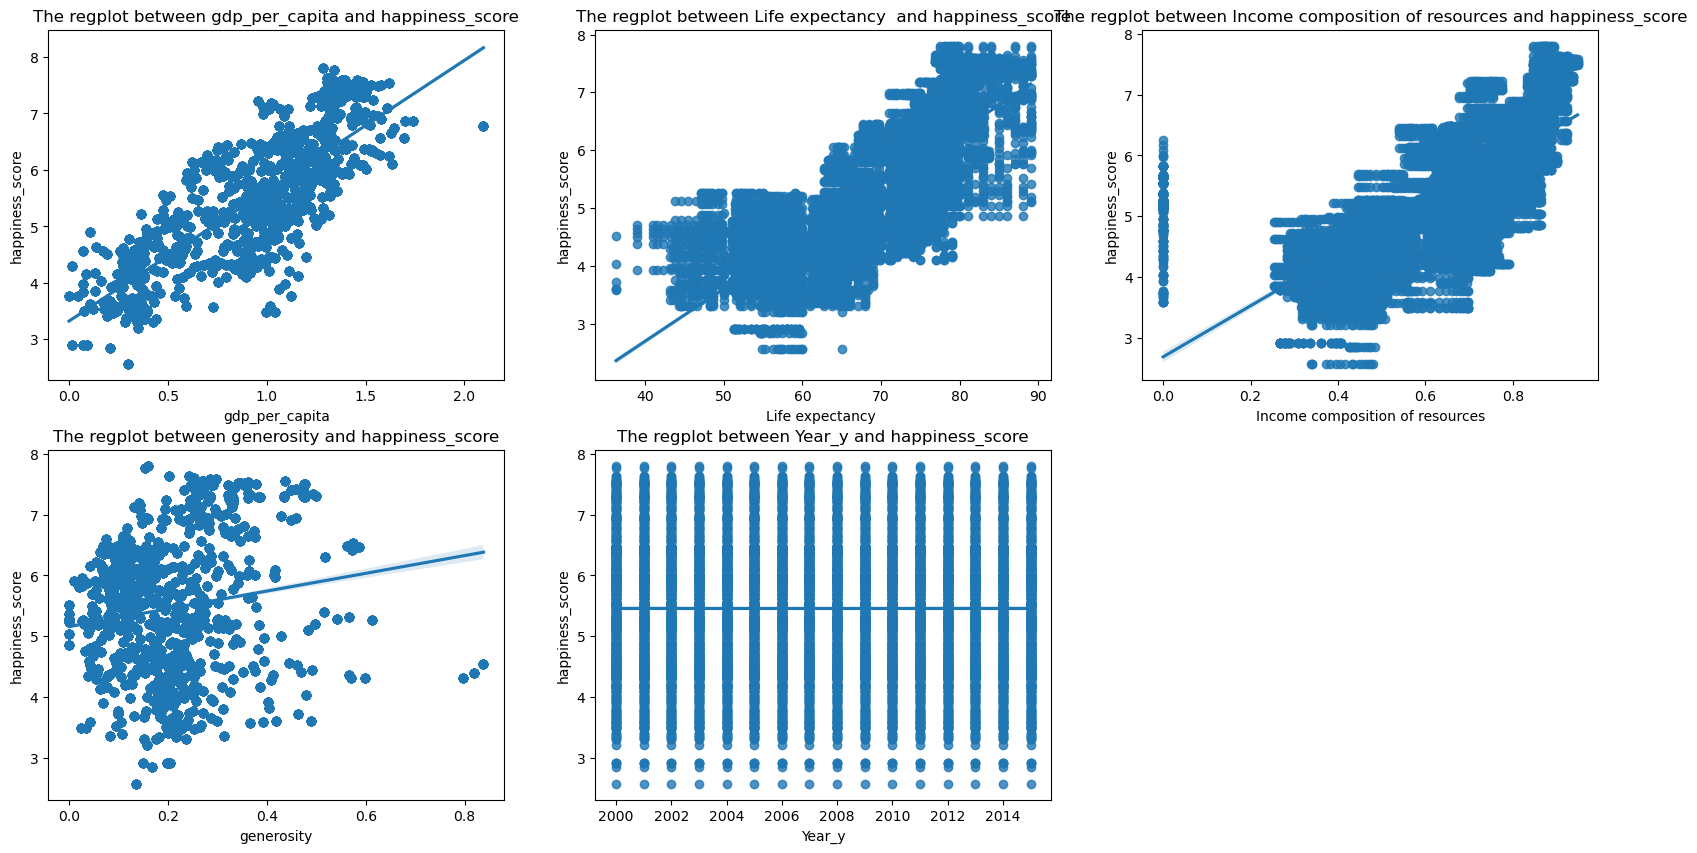

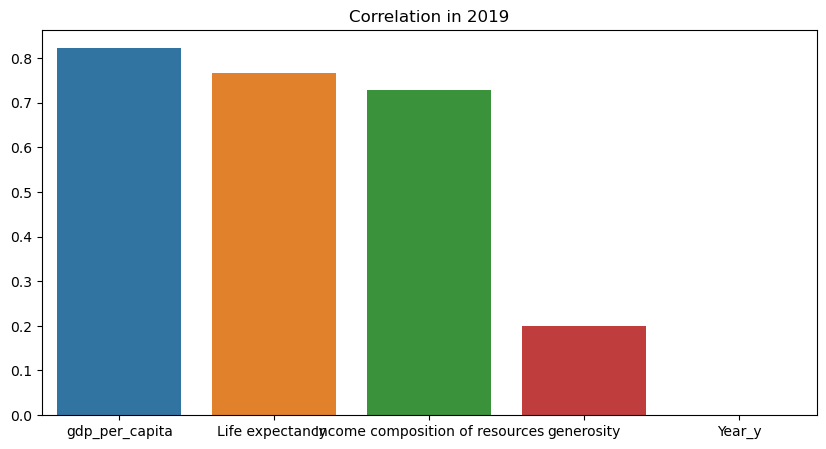

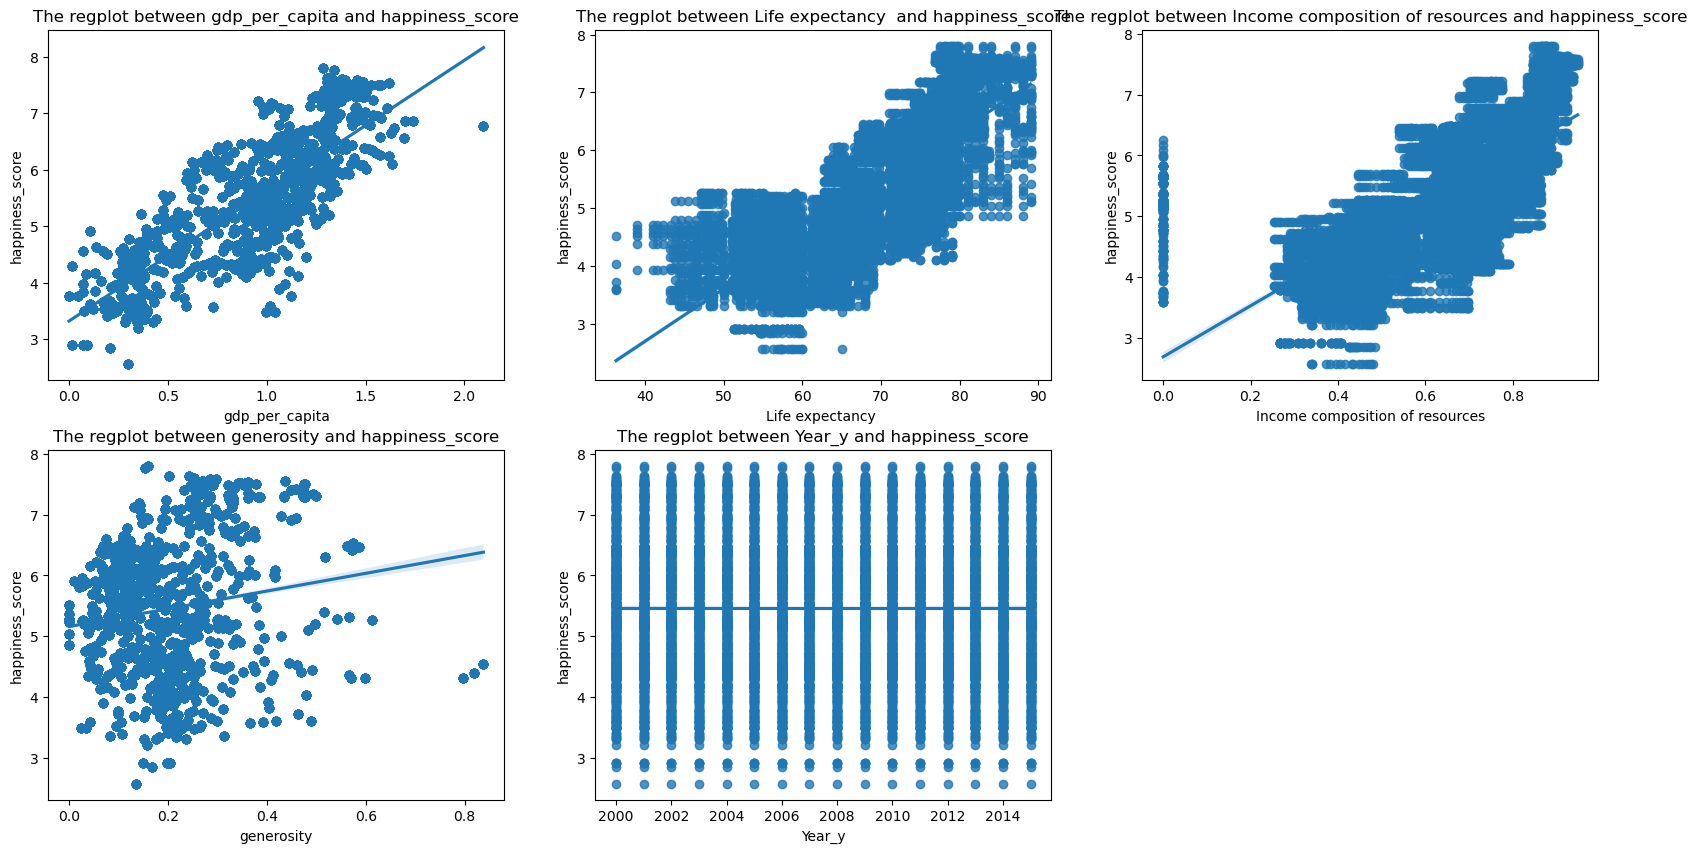

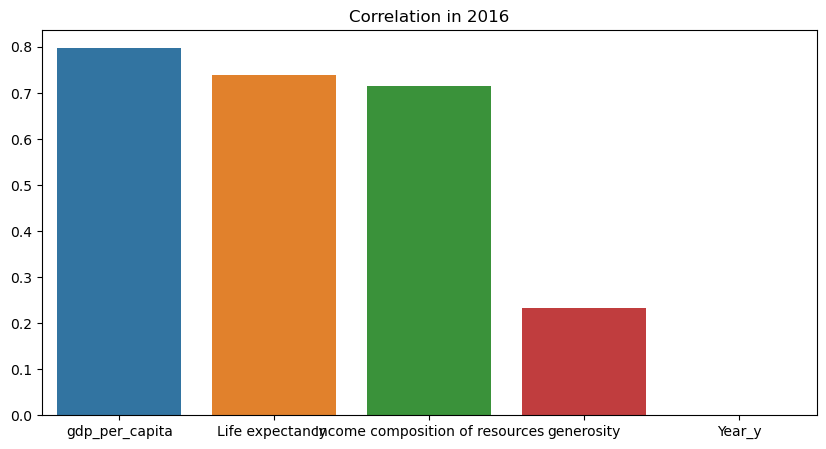

In [80]:
years=data_money_clean.loc[:,["Year_x","happiness_score"]].groupby("Year_x").mean().reset_index().sort_values("happiness_score",ascending=False)["Year_x"].values.tolist()
print(years)

# loop through each year
for year in years: 
    # select data for this country
    data_2015=data_money_clean[data_money["Year_x"]==year] 
    # Calculate the correlation between the country's life expectancy and other fields, and sort them in descending order, and finally return the field name
    columns_high=data_2015.corr().fillna(0).reset_index().loc[:,["index","happiness_score"]].sort_values(by="happiness_score",ascending=False)["index"].values.tolist() 
    # Calculate the correlation between the life of this country and other fields, and sort them in descending order, and finally return the value of life
    values=data_2015.corr().fillna(0).reset_index().loc[:,["index","happiness_score"]].sort_values(by="happiness_score",ascending=False)["Life expectancy "].values.tolist()  
    # Get the first six fields
    columns_high=columns_high[1:7]
    # Take the first six life expectancy
    values=values[1:7]  
    plt.figure(figsize=(20,10))
    for i,column in enumerate(columns_high):
        plt.subplot(2,3,i+1)
        # Draw a linear graph of this field and lifetime
        seaborn.regplot(x=column,y="happiness_score",data=data_money_clean)  
        plt.title(f"The regplot between {column} and happiness_score")
    plt.savefig(f"output_data/{year} regplot.png")
    plt.figure(figsize=(10,5))
    # field and lifetime correlation bar chart
    seaborn.barplot(x=columns_high,y=values)  
    plt.title(f"Correlation in {year}")
    plt.savefig(f"output_data/{year} corr.png")

['Developed', 'Developing']


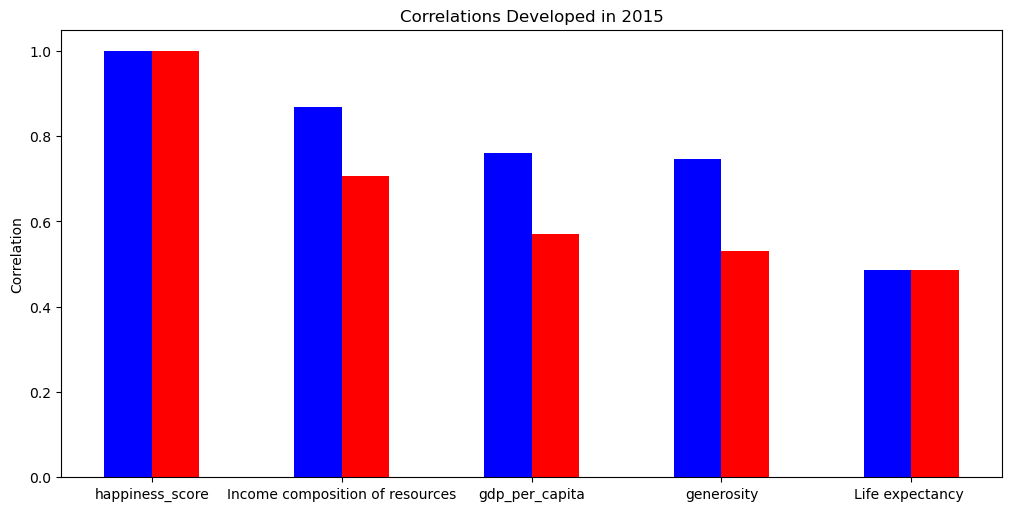

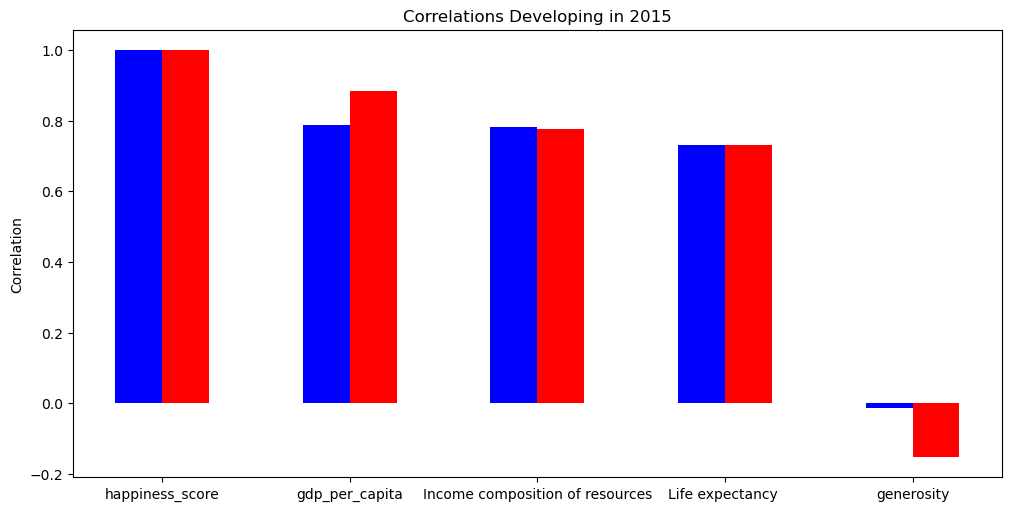

In [177]:
# Select the top ten countries with average life expectancy for analysis
status=data_money.loc[:,["Status","happiness_score"]].groupby("Status").mean().reset_index().sort_values("happiness_score",ascending=False)["Status"].values.tolist()
print(status)

# loop through each country
for develop in status: 
    # select data for this country
    data_d_money=data_money[data_money["Status"]==develop]  
    # Calculate the correlation between the country's life expectancy and other fields, and sort them in descending order, and finally return the field name

    #x_axis2=data_money.corr().fillna(0).reset_index().loc[:,["index","Life expectancy "]].sort_values(by="Life expectancy ",ascending=False)["index"].values.tolist()
    # Calculate the correlation between the life of this country and other fields, and sort them in descending order, and finally return the value of life
    y_axis1=data_d_money.corr().fillna(0).reset_index().loc[:,["index","happiness_score"]].sort_values(by="happiness_score",ascending=False)["happiness_score"].values.tolist()  
    y_axis2=data_d_money.corr().fillna(0).reset_index().loc[:,["index","Life expectancy "]].sort_values(by="Life expectancy ",ascending=False)["Life expectancy "].values.tolist()  

    # Set position of bar on X axis
    barWidth = 0.25
    fig = plt.subplots(layout='constrained')

    bar1 = np.arange(len(y_axis1))
    bar2 = [x + barWidth for x in bar1]

    #plt.savefig(f"output_data/{year} regplot.png")
    #plt.figure(figsize=(10,5))
    # field and lifetime correlation bar chart
    plt.bar(bar1,y_axis1, color ="b", width = barWidth)
    plt.bar(bar2,y_axis2, color ="r", width = barWidth)
    plt.ylabel('Correlation')
    plt.xticks(bar1+.125, x_axis1)
    plt.title(f"Correlations {develop} in 2015")
    plt.savefig(f"output_data/2015 corr {develop}.png")

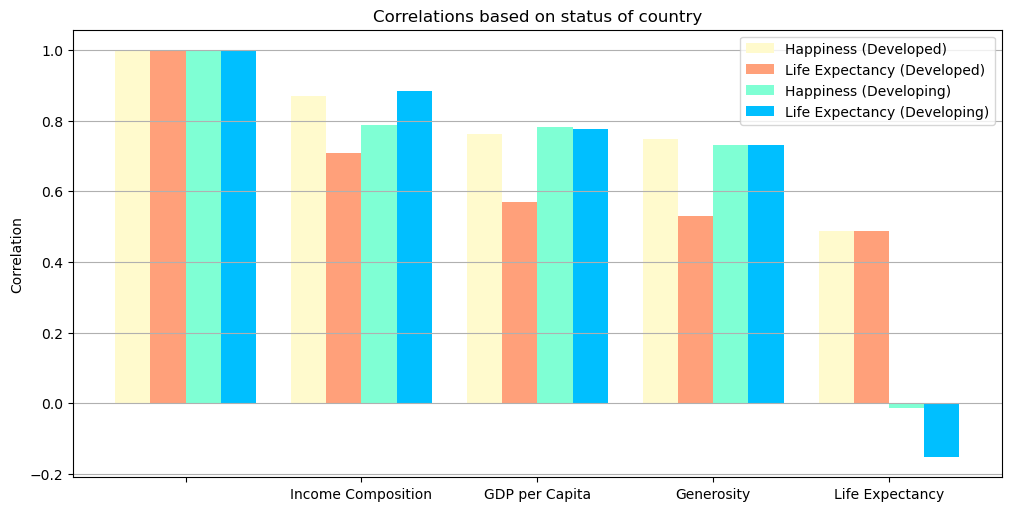

In [198]:
# select data for status Developed
data_D_money=data_money[data_money["Status"]=="Developed"]
x_axis1=data_d_money.corr().fillna(0).reset_index().loc[:,["index","happiness_score"]].sort_values(by="happiness_score",ascending=False)["index"].values.tolist()
# Calculate the correlation between the happiness of this status and other fields, and sort them in descending order, and finally return the value of happiness
y_axis1=data_D_money.corr().fillna(0).reset_index().loc[:,["index","happiness_score"]].sort_values(by="happiness_score",ascending=False)["happiness_score"].values.tolist()  
# Calculate the correlation between the life of this status and other fields, and sort them in descending order, and finally return the value of life
x_axis2=data_d_money.corr().fillna(0).reset_index().loc[:,["index","Life expectancy "]].sort_values(by="Life expectancy ",ascending=False)["Life expectancy "].values.tolist()  
y_axis2=data_D_money.corr().fillna(0).reset_index().loc[:,["index","Life expectancy "]].sort_values(by="Life expectancy ",ascending=False)["Life expectancy "].values.tolist()  

# select data for status Developing
data_d_money=data_money[data_money["Status"]=="Developing"]  
# Calculate the correlation between the happiness of this status and other fields, and sort them in descending order, and finally return the value of happiness
y_axis3=data_d_money.corr().fillna(0).reset_index().loc[:,["index","happiness_score"]].sort_values(by="happiness_score",ascending=False)["happiness_score"].values.tolist()  
# Calculate the correlation between the life of this status and other fields, and sort them in descending order, and finally return the value of life
y_axis4=data_d_money.corr().fillna(0).reset_index().loc[:,["index","Life expectancy "]].sort_values(by="Life expectancy ",ascending=False)["Life expectancy "].values.tolist()  

# Set position of bar on X axis
barWidth = 0.2
fig = plt.subplots(layout='constrained')
output = ("happiness", "Income Composition", "GDP per Capita", "Generosity","Life Expectancy")

bar1 = np.arange(len(y_axis1))
bar2 = [x + barWidth for x in bar1]
bar3 = [x + barWidth for x in bar2]
bar4 = [x + barWidth for x in bar3]

# field and lifetime correlation bar chart
plt.bar(bar1,y_axis1, color ="lemonchiffon", width = barWidth, label = "Happiness (Developed)")
plt.bar(bar2,y_axis2, color ="lightsalmon", width = barWidth, label = "Life Expectancy (Developed)")
plt.bar(bar3,y_axis3, color ="aquamarine", width = barWidth, label = "Happiness (Developing)")
plt.bar(bar4,y_axis4, color ="deepskyblue", width = barWidth, label = "Life Expectancy (Developing)")
plt.ylabel('Correlation')
plt.legend()
plt.xticks(bar1+.3, output)
plt.grid(axis = "y")
plt.title(f"Correlations based on status of country")
plt.savefig(f"output_data/2015 corr status.png")

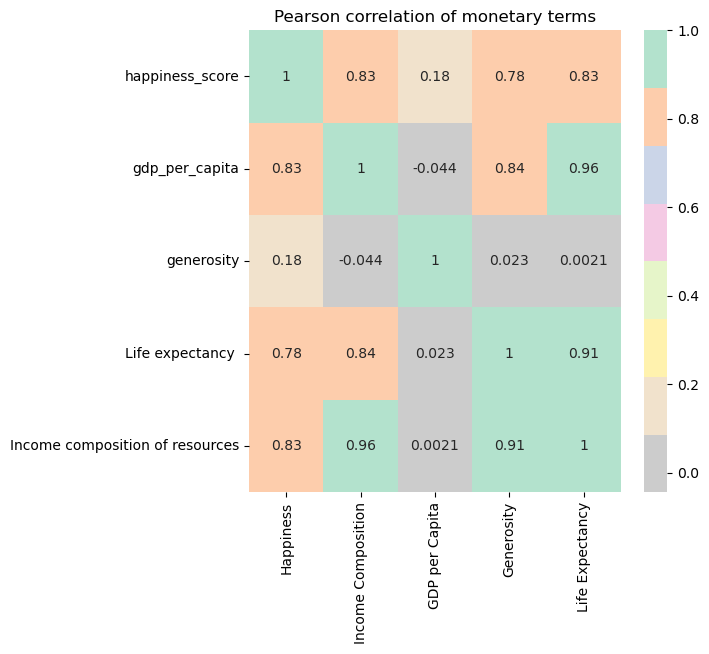

In [244]:
#loading the features dataframe
data_money = LH2015_dataf[["Country","Status","happiness_score","gdp_per_capita","generosity","Life expectancy ","Income composition of resources"]]

#ploting the heatmap for correlation
output = ("Happiness", "Income Composition", "GDP per Capita", "Generosity","Life Expectancy")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
seaborn.heatmap(data_money.corr(method='pearson'), annot=True, cmap="Pastel2_r").set(title='Pearson correlation of monetary terms')
plt.xticks(bar1+.5, output)
plt.savefig(f"output_data/2015 person corr.png")
plt.show()

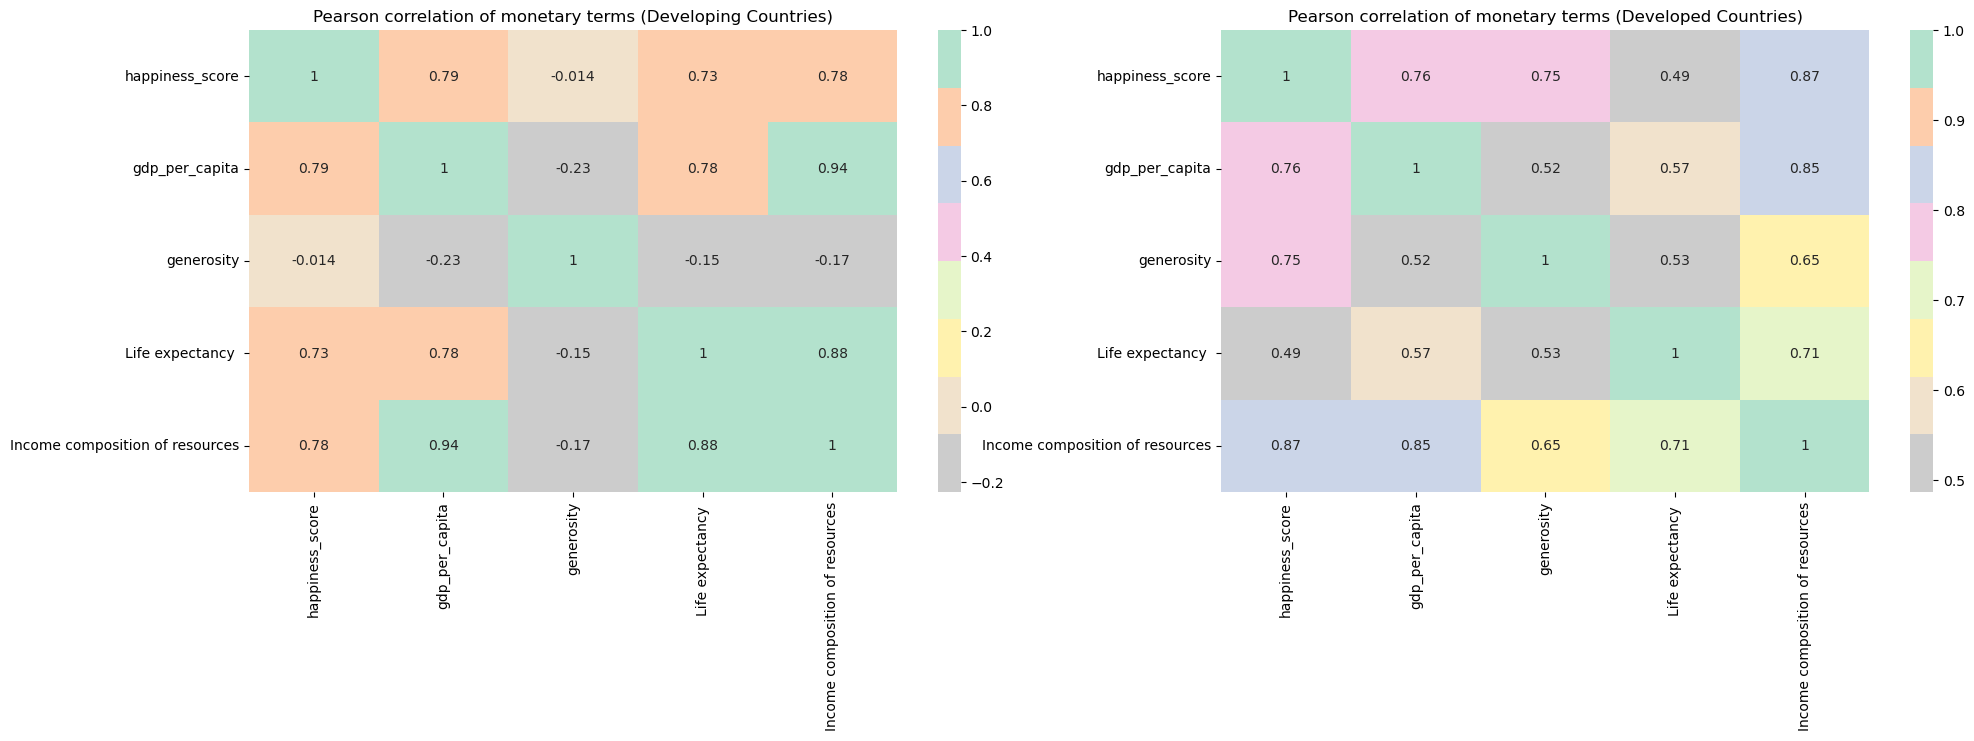

In [249]:
#loading the features dataframe
data_money = LH2015_dataf[["Country","Status","happiness_score","gdp_per_capita","generosity","Life expectancy ","Income composition of resources"]]
data_d_money=data_money[data_money["Status"]=="Developing"]
data_D_money=data_money[data_money["Status"]=="Developed"]
#ploting the heatmap for correlation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(23,6))
seaborn.heatmap(data_d_money.corr(method='pearson'), annot=True, cmap="Pastel2_r", ax=axes[0]).set(title='Pearson correlation of monetary terms (Developing Countries)')
seaborn.heatmap(data_D_money.corr(method='pearson'), annot=True, cmap="Pastel2_r", ax=axes[1]).set(title='Pearson correlation of monetary terms (Developed Countries)')
plt.savefig(f"output_data/2015 person corr status.png")
plt.show()

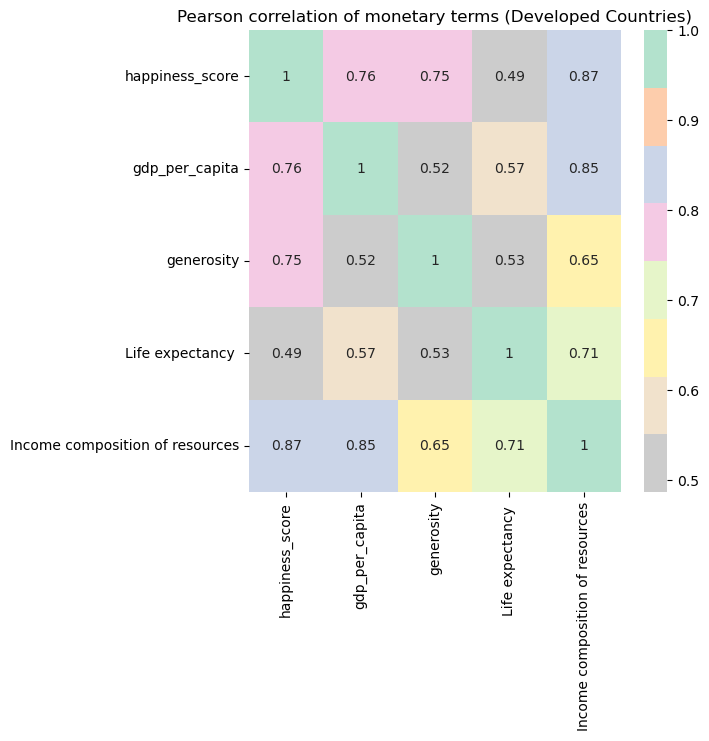

In [254]:
#loading the features dataframe
data_money = LH2015_dataf[["Country","Status","happiness_score","gdp_per_capita","generosity","Life expectancy ","Income composition of resources"]]
data_D_money=data_money[data_money["Status"]=="Developed"]
#ploting the heatmap for correlation
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
seaborn.heatmap(data_D_money.corr(method='pearson'), annot=True, cmap="Pastel2_r").set(title='Pearson correlation of monetary terms (Developed Countries)')
plt.savefig(f"output_data/2015 person corrD.png")
plt.show()

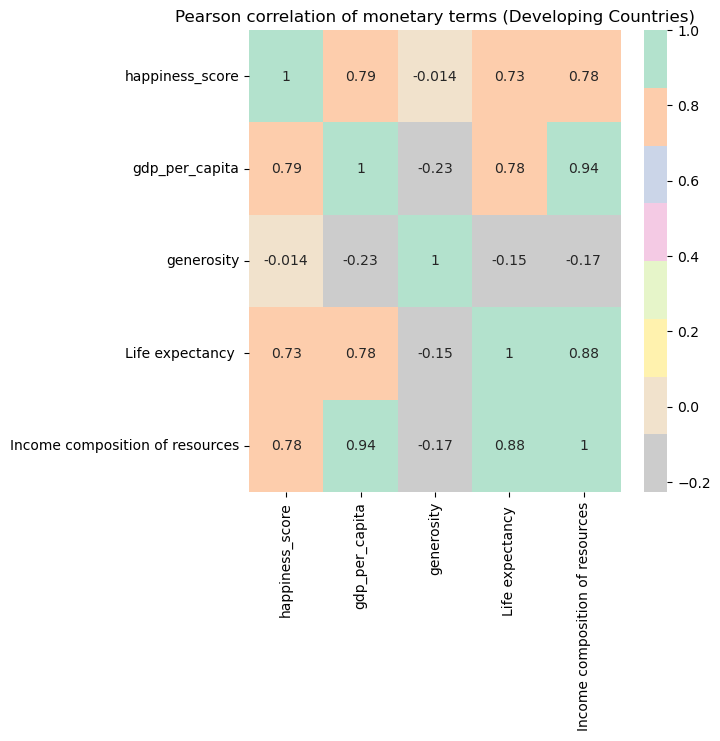

In [253]:
#loading the features dataframe
data_money = LH2015_dataf[["Country","Status","happiness_score","gdp_per_capita","generosity","Life expectancy ","Income composition of resources"]]
data_D_money=data_money[data_money["Status"]=="Developing"]
#ploting the heatmap for correlation
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
seaborn.heatmap(data_D_money.corr(method='pearson'), annot=True, cmap="Pastel2_r").set(title='Pearson correlation of monetary terms (Developing Countries)')
plt.savefig(f"output_data/2015 person corrd.png")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1,) and (6,)

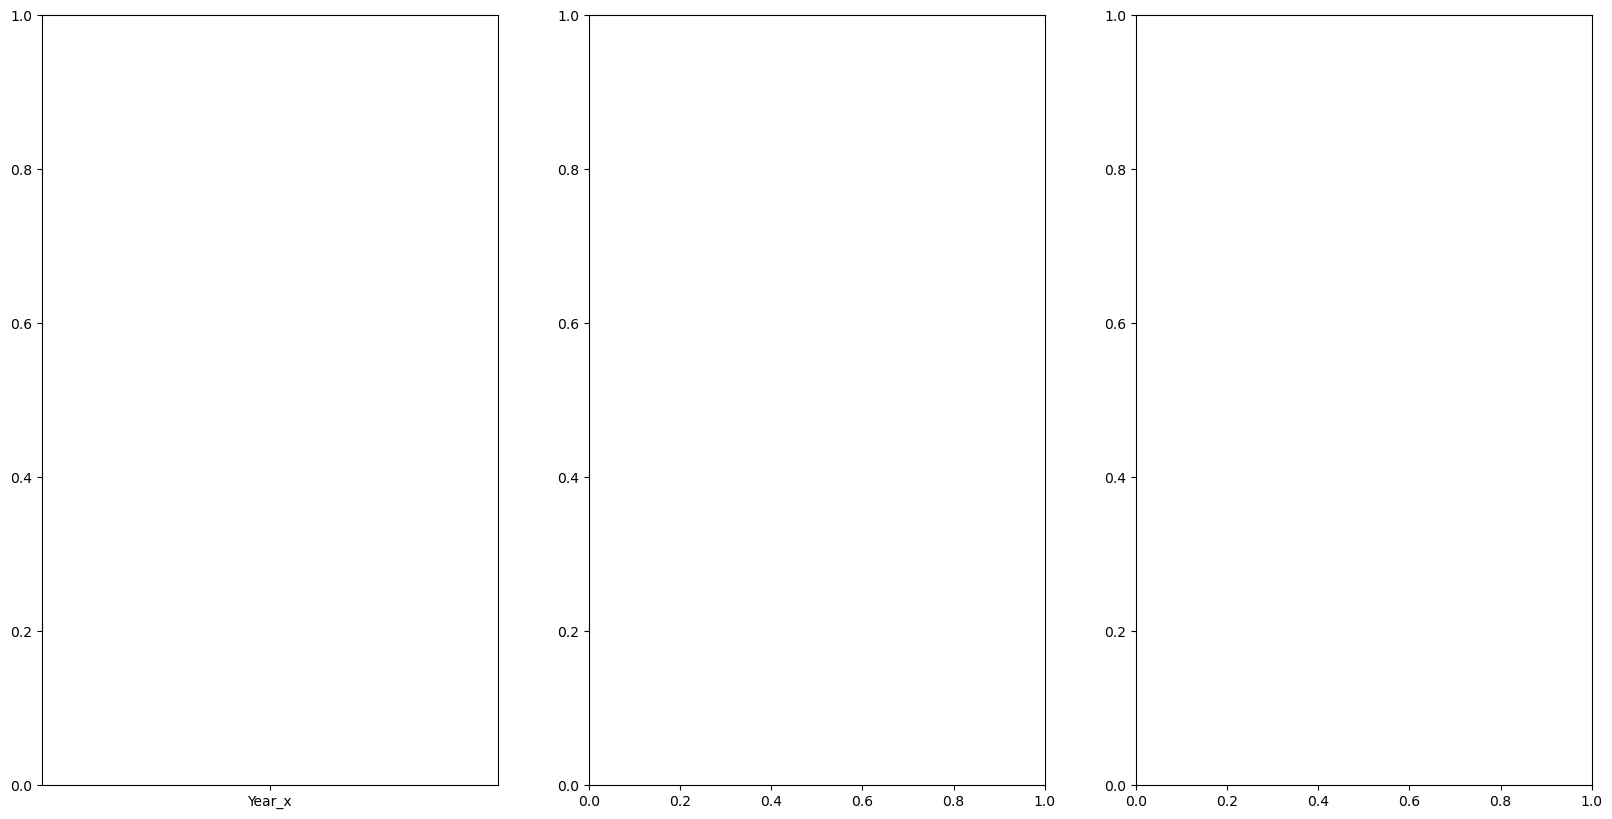

In [285]:
data_money_all = LH_dataf[["Year_x","Country","Status","happiness_score","gdp_per_capita","generosity","Life expectancy ","Income composition of resources"]]
data_money_all = data_money_all.drop_duplicates(subset=["Year_x","Country"],keep="first")
data_money_all["Year_x"] = data_money_all["Year_x"].map("{:.0f}".format)
data_money_all.set_index("Year_x")
data_money_all_years = data_money_all.groupby("Year_x")
dmay=data_money_all_years[["happiness_score","gdp_per_capita","generosity","Life expectancy ","Income composition of resources"]].mean()
fig,(axs1,axs2,axs3) = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
axs1.plot("Year_x","happiness_score",data=dmay)
axs2.plot('Year_x','gdp_per_capita',data=dmay)
axs3.plot('Year_x','Life expectancy ',data=dmay)
fig.suptitle='Variation in life expectancy over time across countries'
plt.show()

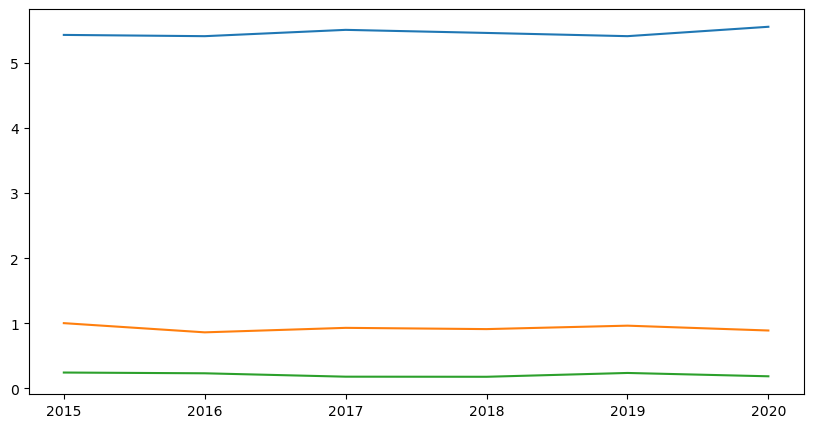